# **The goal here is to test the written loader, preprocessor and visualizer functions**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# !pip install lazypredict

In [3]:
# # navigate to root directory of current file in order to access other files relatively
# %cd /content/drive/MyDrive/Colab\ Notebooks/project-seraphim/server-side/modelling

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

import chardet

from utilities.loaders import \
    load_corpus, \
    get_chars, \
    load_lookup_array, \
    save_lookup_array, \
    load_meta_data, \
    save_meta_data, \
    construct_embedding_dict, \
    construct_embedding_matrix, \
    get_cat_cols, \
    get_top_models, \
    load_model, \
    save_model, \
    create_image_set

from utilities.preprocessors import \
    map_value_to_index, \
    remove_contractions, \
    rem_non_alpha_num, \
    capitalize, \
    filter_valid, \
    partition_corpus, \
    rem_stop_words, \
    stem_corpus_words, \
    lemmatize_corpus_words, \
    string_list_to_list, \
    flatten_series_of_lists, \
    sentences_to_avgs, \
    normalize_ratings, \
    normalize_rating_matrix, \
    normalize_train_cross, \
    encode_features

from utilities.visualizers import \
    plot_train_cross_features, \
    analyze, \
    view_words, \
    data_split_metric_values, \
    view_value_frequency, \
    multi_class_heatmap, \
    view_metric_values, \
    view_classified_labels, \
    view_label_freq, \
    disp_cat_feat, \
    describe_col, \
    visualize_graph, \
    plot_evolution, \
    view_clusters_3d, \
    ModelResults, \
    plot_all_features, \
    view_images
    

%load_ext autoreload
%autoreload 2

# Loading different datasets as different test cases for loader, preprocessor, and visualizer functions

## California Housing (all continuous inputs & continuous outputs)
1. load
2. visualize raw
3. split
4. visualize split
5. engineer novel features
6. normalize
7. visualize normalization

In [5]:
cal_housing = pd.read_csv('./data/cal_housing.data', sep=',', header=None)

# preprocessing X and Y data
ch_X, ch_Y = cal_housing.loc[:, 0:7].to_numpy(), cal_housing.loc[:, 8].to_numpy()
ch_X

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  3.2200e+02,
         1.2600e+02,  8.3252e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  2.4010e+03,
         1.1380e+03,  8.3014e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  4.9600e+02,
         1.7700e+02,  7.2574e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  1.0070e+03,
         4.3300e+02,  1.7000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  7.4100e+02,
         3.4900e+02,  1.8672e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  1.3870e+03,
         5.3000e+02,  2.3886e+00]])

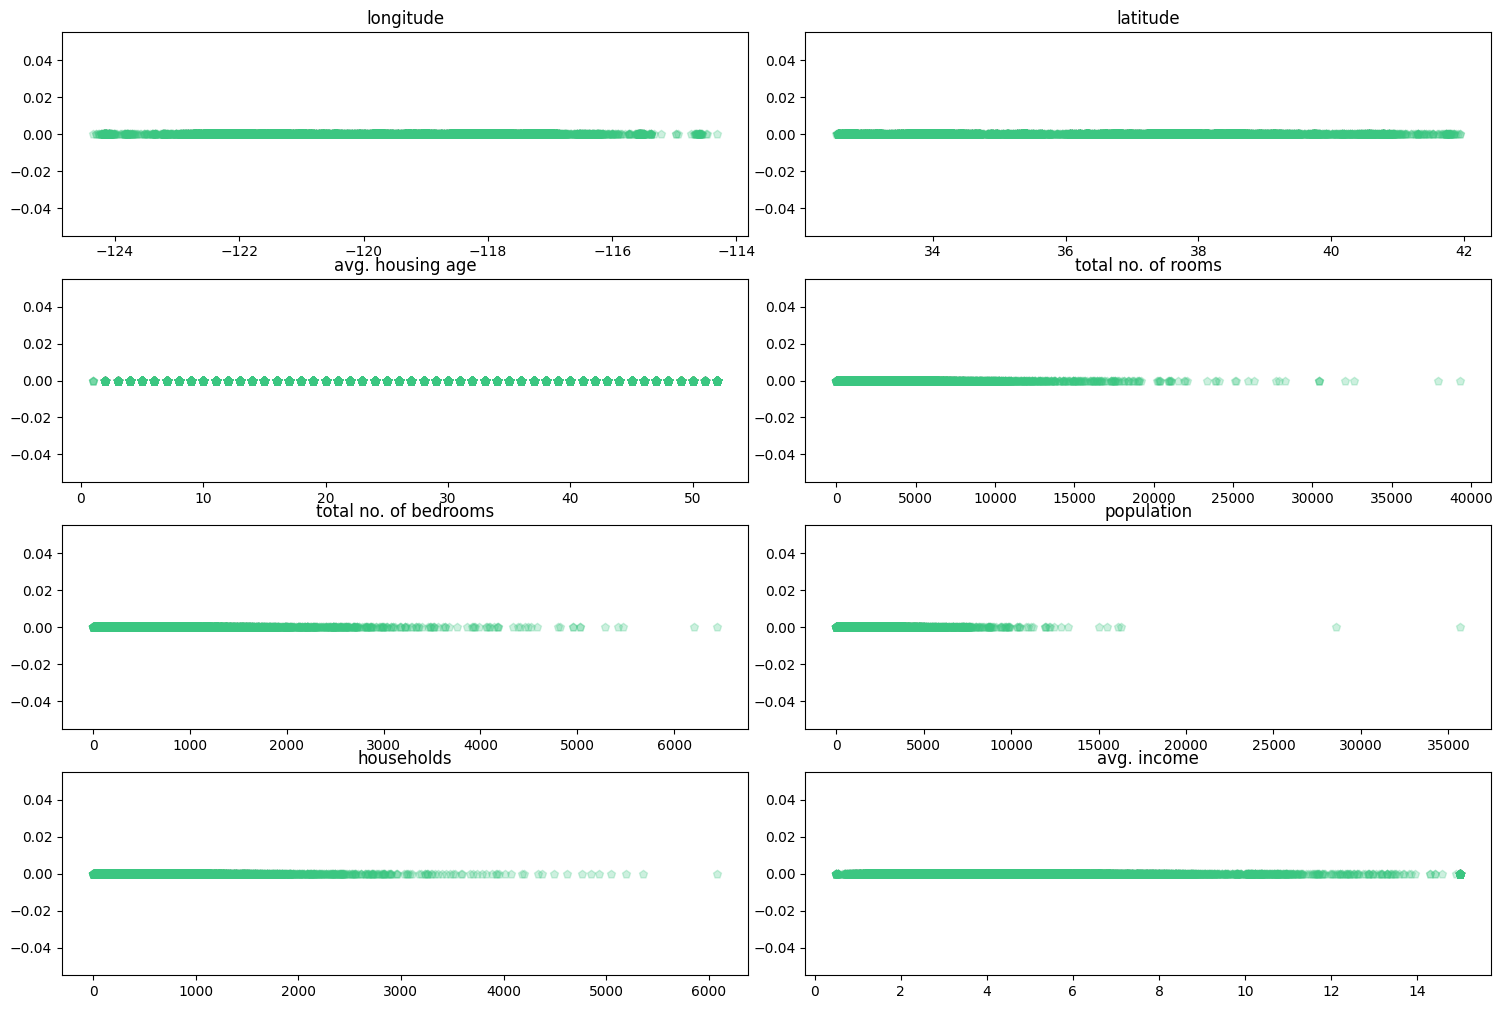

In [6]:
feature_names = ["longitude", "latitude", "avg. housing age", "total no. of rooms", "total no. of bedrooms", "population", "households", "avg. income"]
analyze(ch_X, feature_names=feature_names, color='#3BC681')

In [7]:
ch_X_trains, ch_X_cross, ch_Y_trains, ch_Y_cross = train_test_split(ch_X, ch_Y, test_size=0.3, random_state=0)

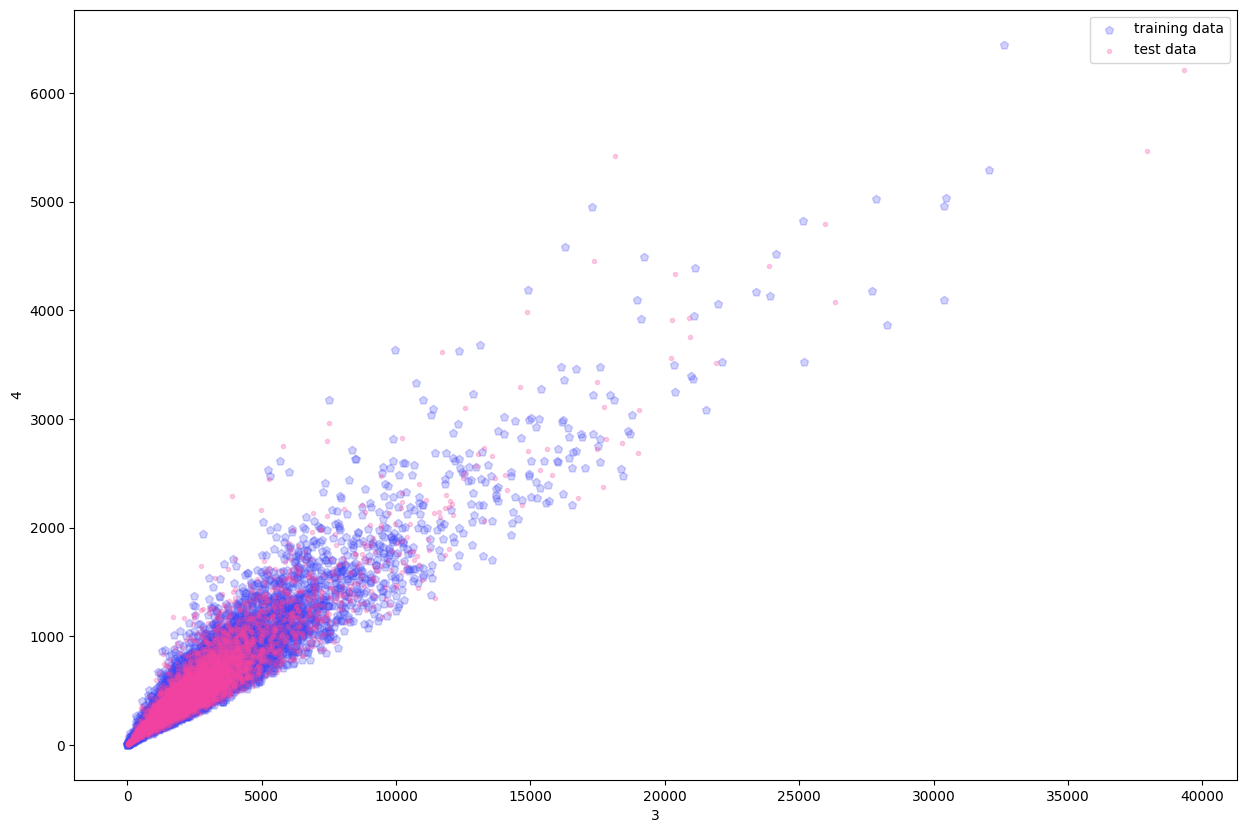

In [8]:
feature_2 = feature_names.index('total no. of bedrooms')
feature_1 = feature_names.index('total no. of rooms')
plot_train_cross_features(ch_X_trains, ch_X_cross, feature_1, feature_2)

In [9]:
ch_X_trains, ch_X_cross, ch_scaler = normalize_train_cross(ch_X_trains, ch_X_cross)

## Laptop prices (both continous & discrete inputs and continuous outputs)
1. load
2. visualize raw
3. encode categorical features
4. visualize encoded categorical features
5. split
6. visualize split

In [10]:
with open('./data/laptop_price.csv', 'rb') as file:
  result = chardet.detect(file.read())
result['encoding']

'ISO-8859-1'

In [11]:
laptop_price = pd.read_csv('./data/laptop_price.csv', index_col=0, encoding='ISO-8859-1')

# laptop_price.columns != "Price_euros"
lp_X, lp_Y = laptop_price.loc[:, laptop_price.columns != 'Price_euros'], laptop_price['Price_euros']
lp_X.reset_index(drop=True, inplace=True)

In [12]:
cat_cols = get_cat_cols(lp_X)
cat_cols

['ScreenResolution',
 'Company',
 'Memory',
 'Weight',
 'Gpu',
 'Cpu',
 'Product',
 'TypeName',
 'Ram',
 'OpSys']

['#1CFD49', '#D6E800', '#506C20', '#312073', '#C79899', '#F47B7B', '#F49FA0', '#4052DF', '#642B2C', '#D8BB4E', '#1F34CA', '#0537E2', '#833B8A', '#E07B8B', '#840A2E', '#2527E5', '#8946E9', '#8ADA2F', '#ADB4EE', '#49C8FC', '#63CCA9', '#29F901', '#3F0EB1', '#9BE377', '#B522D6', '#EA54D0', '#B0BD2C', '#7C44DA', '#05B810', '#3CC471', '#39F60B', '#4D88A4', '#62D013', '#3F7C12', '#188318', '#C37460', '#C11BB3', '#D4F7B0', '#B550E4', '#AAA0BC'] 40
<BarContainer object of 40 artists>
ScreenResolution
['#1FEEC4', '#A34F17', '#6AD2B3', '#35D66B', '#8ED9FB', '#D589F3', '#49DF7A', '#D069AA', '#11418F', '#097618', '#3C1CEC', '#6EC501', '#5EC62A', '#A25D9A', '#9DC985', '#073495', '#5DAEEE', '#D8AAD0', '#533525'] 19
<BarContainer object of 19 artists>
Company
['#A7992D', '#E28947', '#B46F2E', '#3D5623', '#6C6687', '#42320E', '#F1C8BA', '#D3F7DE', '#1CA0C3', '#E645EC', '#FB0E13', '#471CEC', '#03A868', '#C30475', '#15DBE3', '#AA62F2', '#852461', '#AAECDE', '#C25EB3', '#0F3CEE', '#7451A6', '#51AD9D', '#7

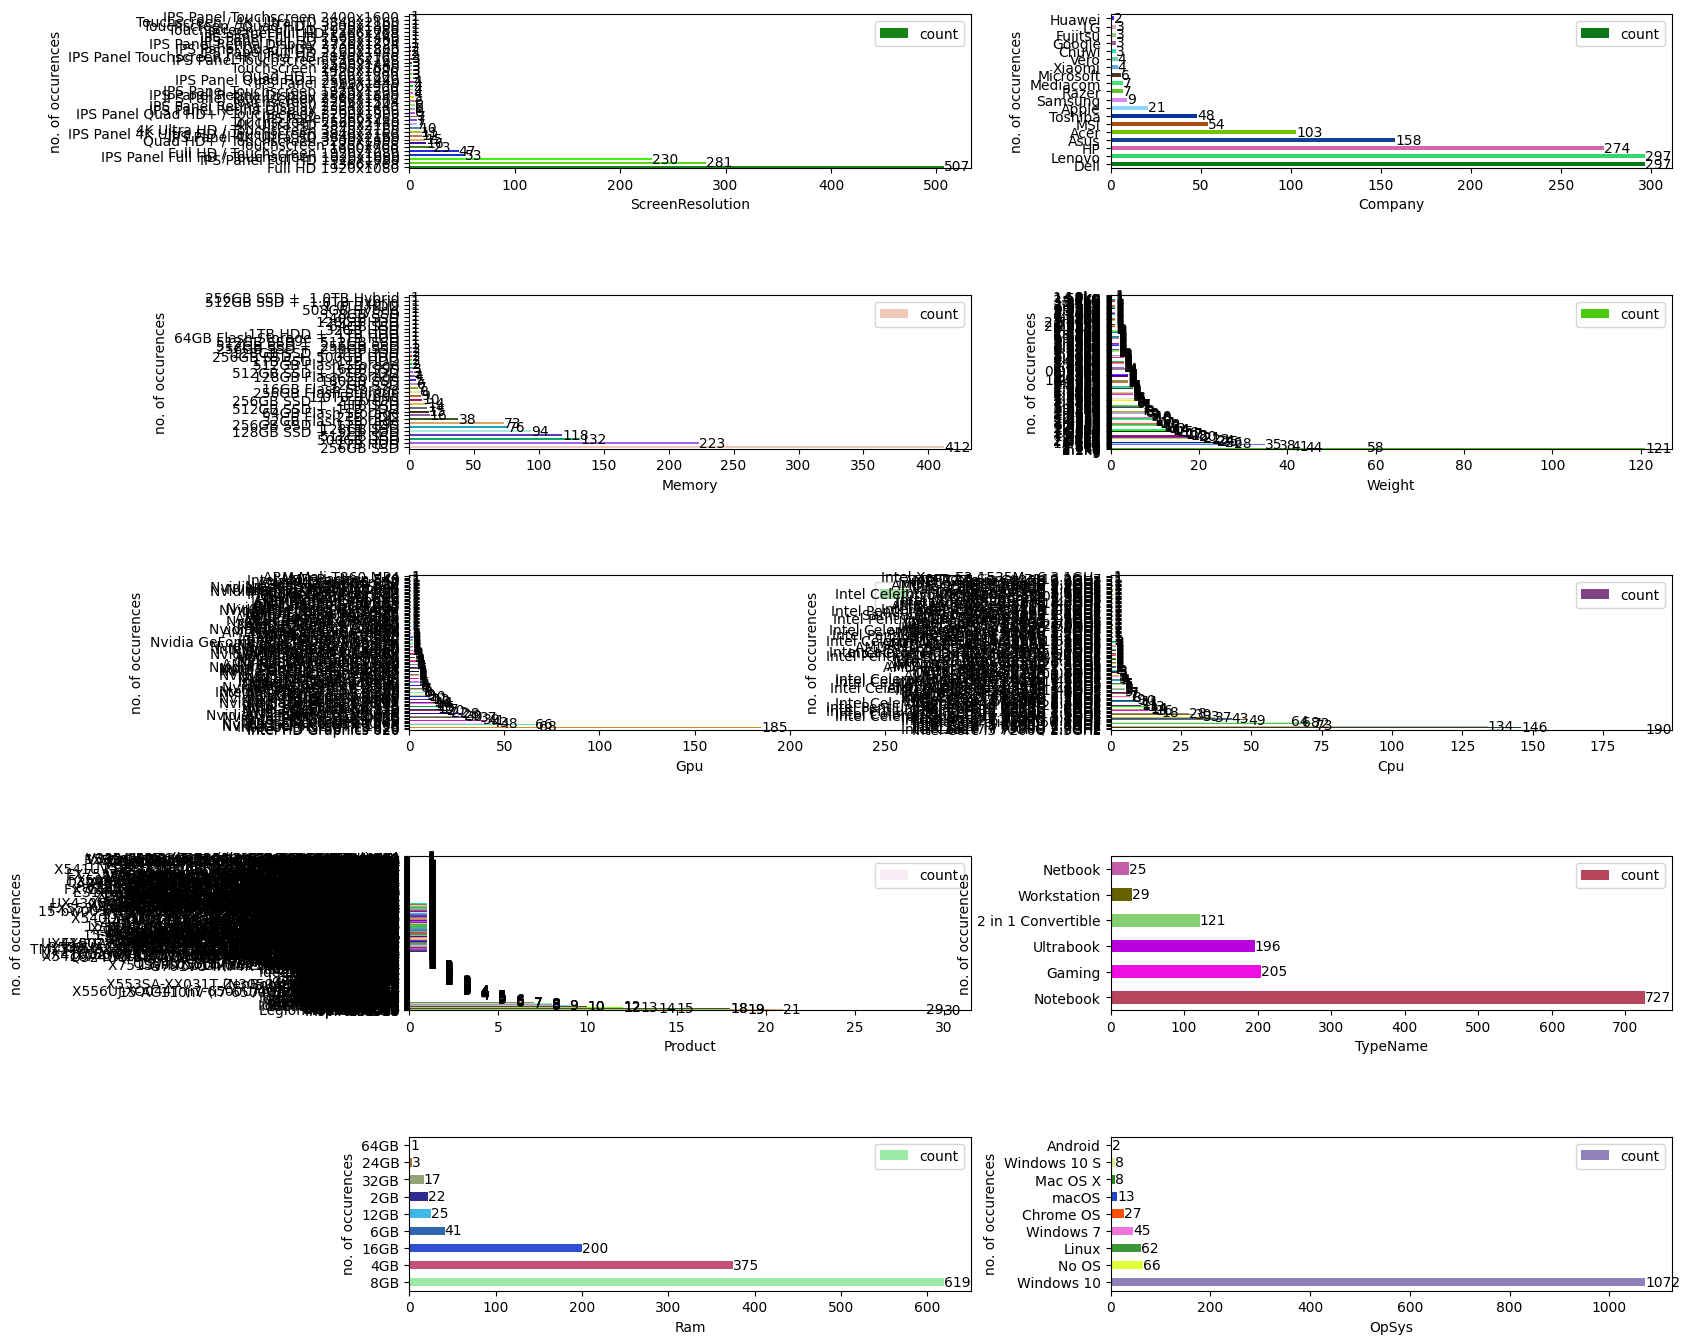

In [13]:
disp_cat_feat(lp_X, cat_cols, fig_dims=(len(cat_cols) // 2, 2))

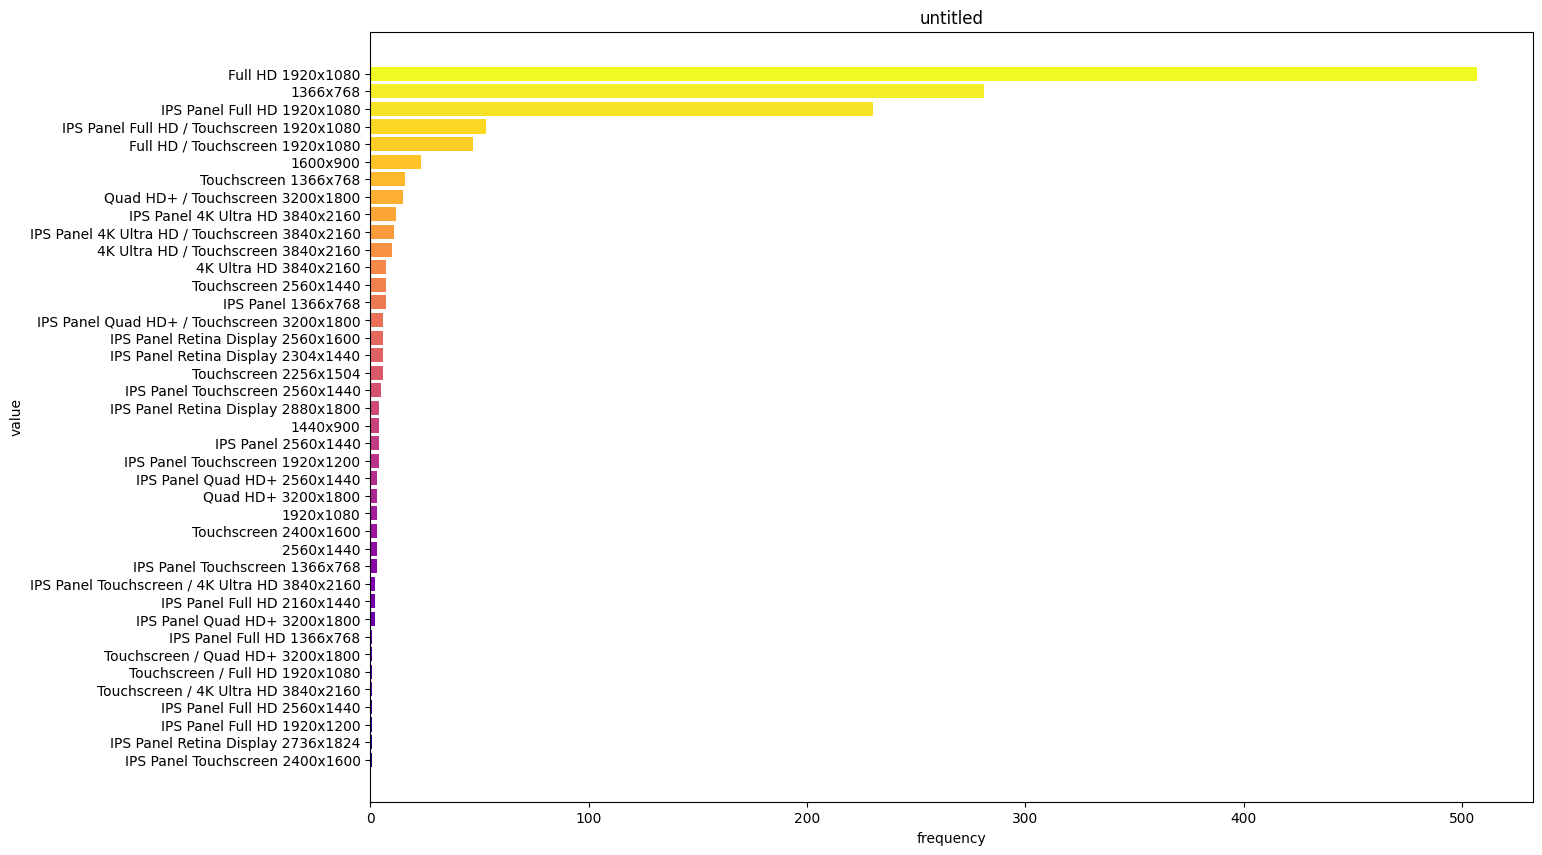

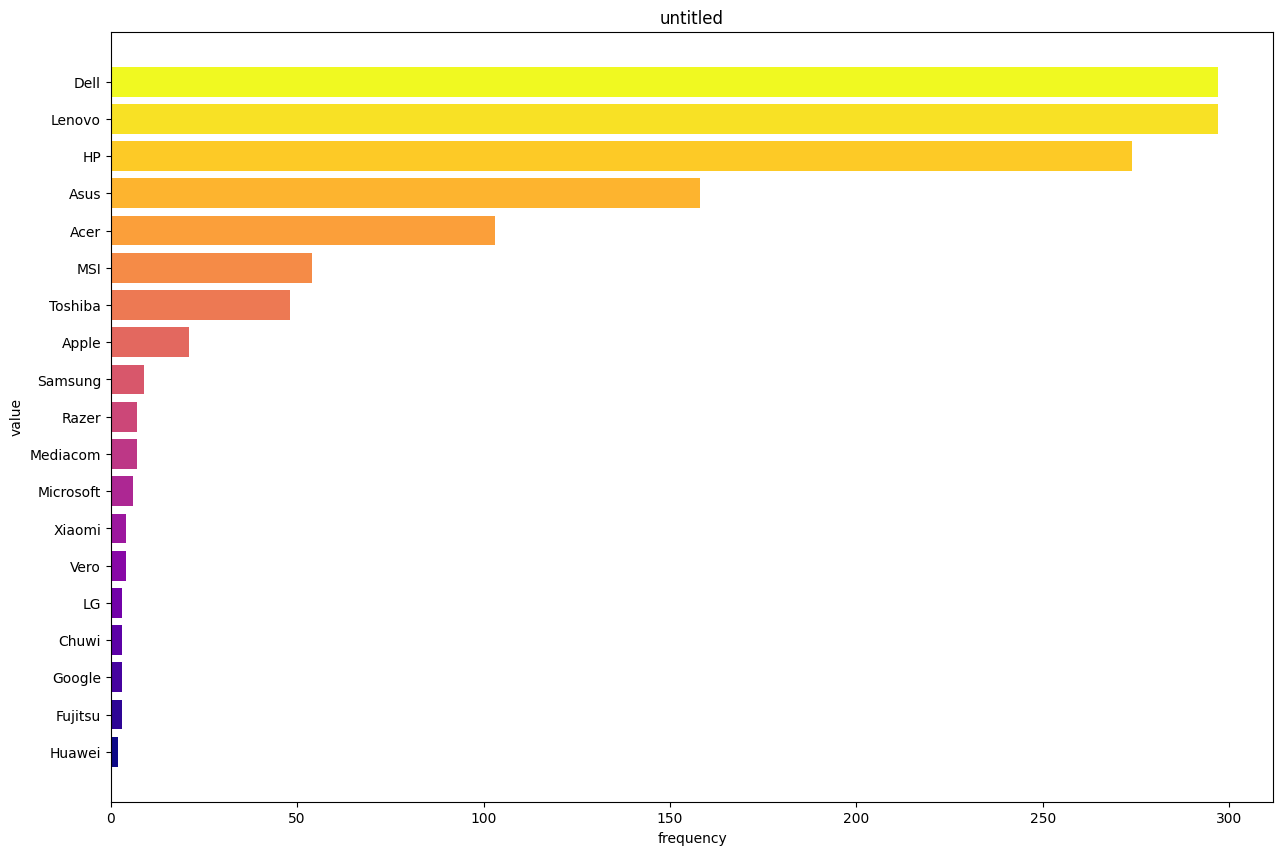

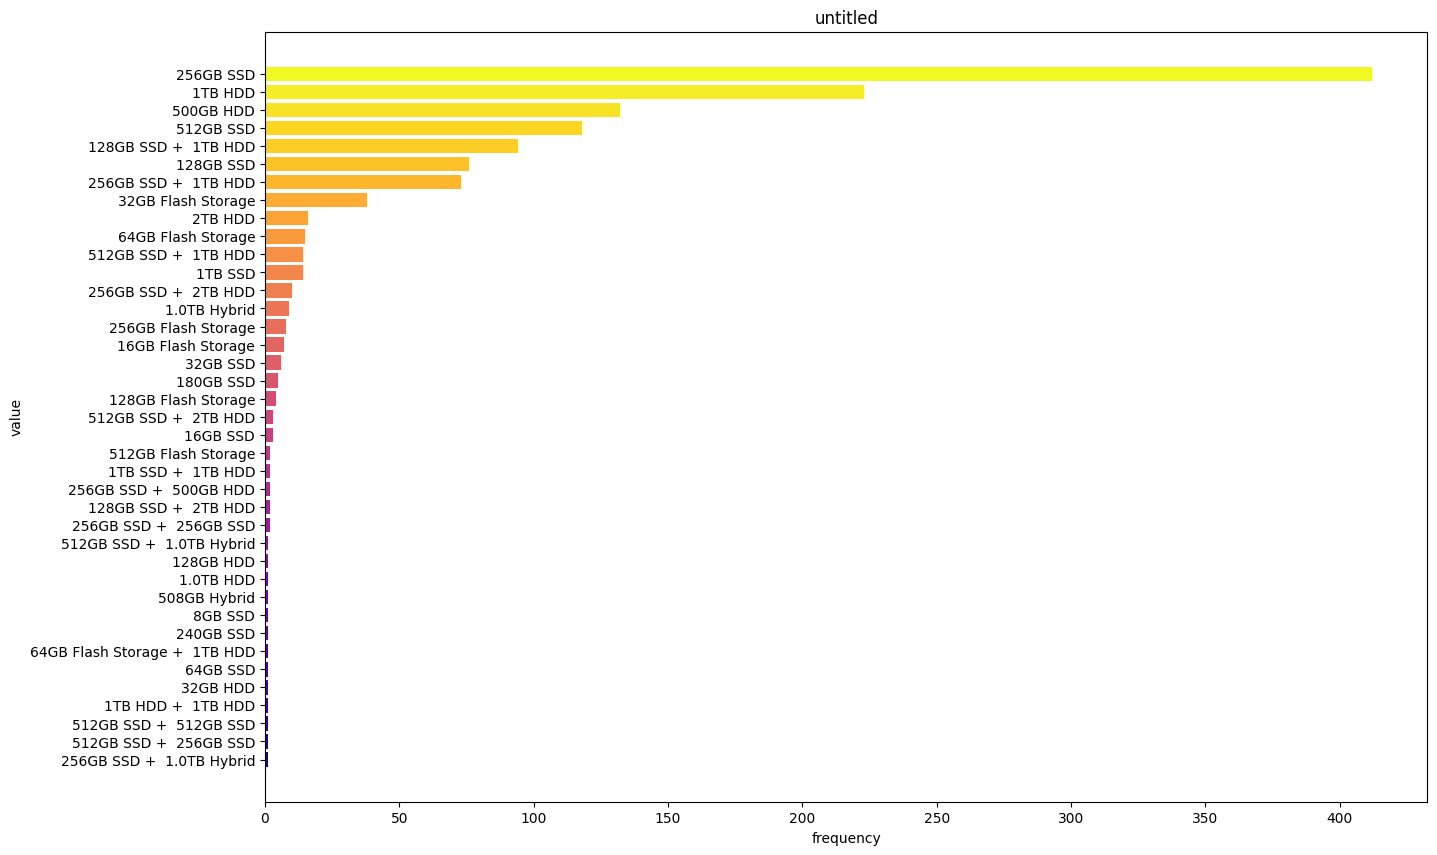

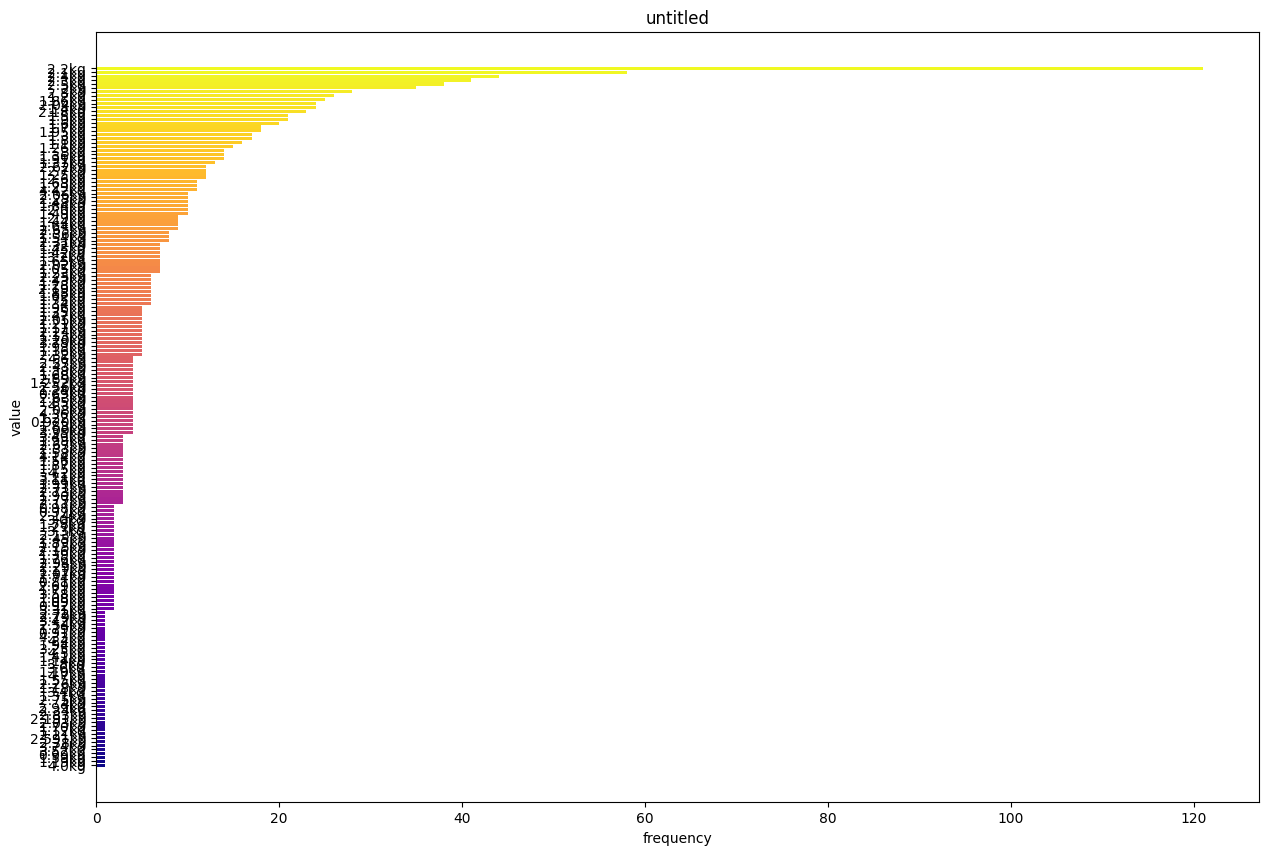

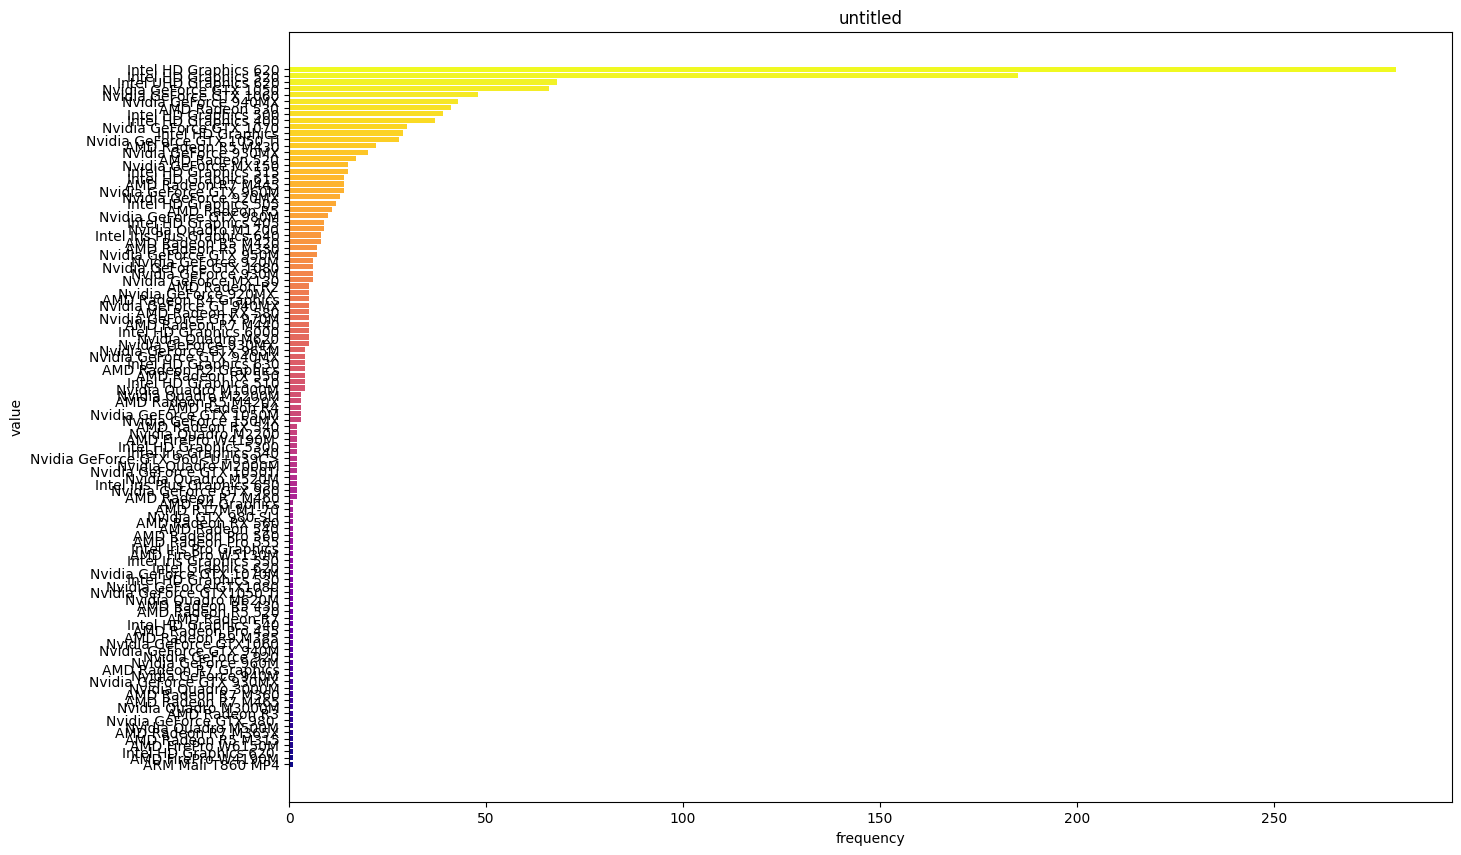

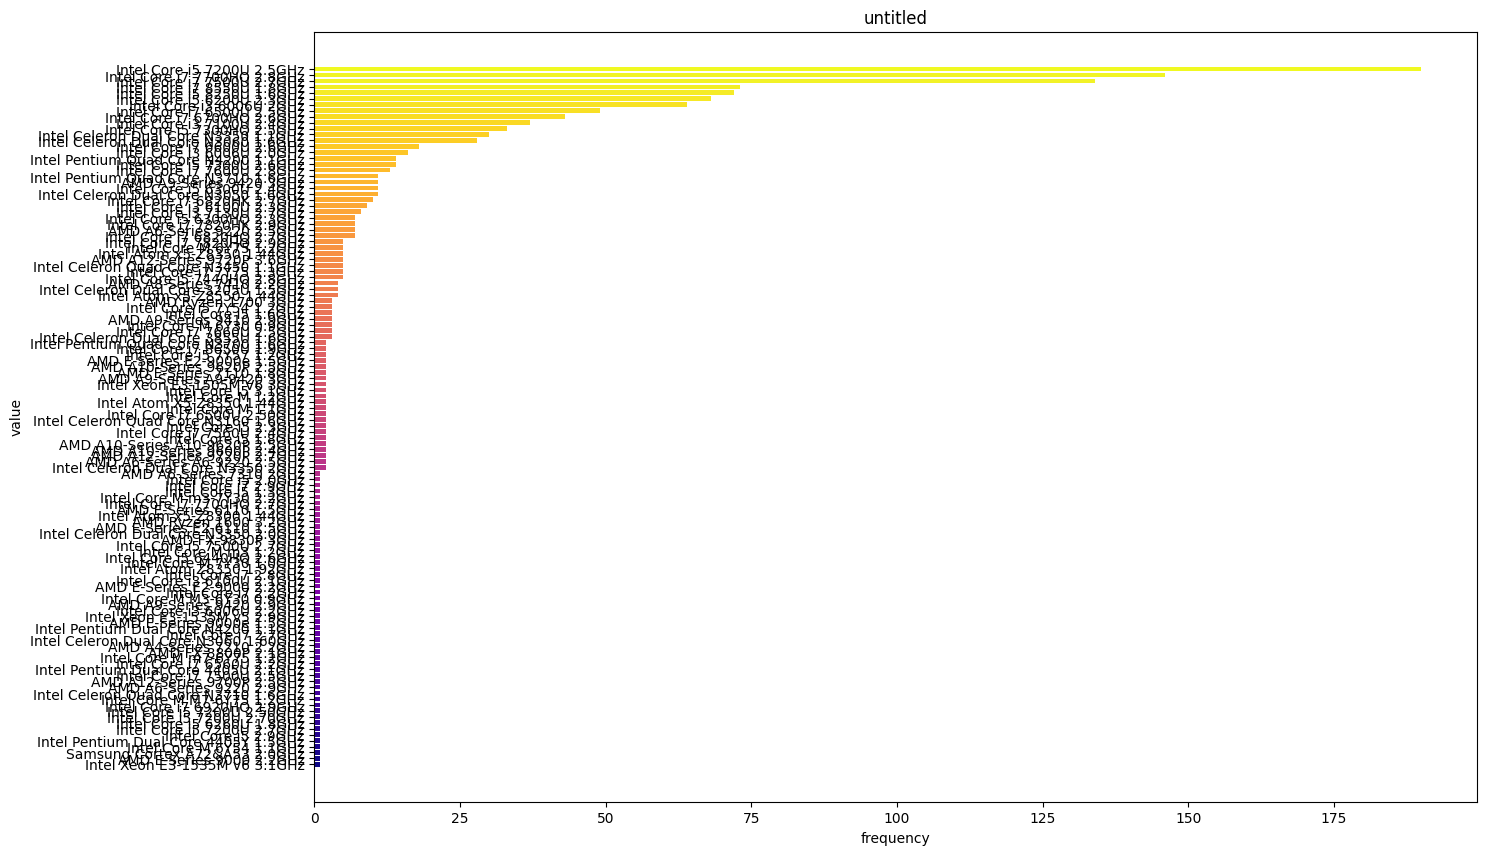

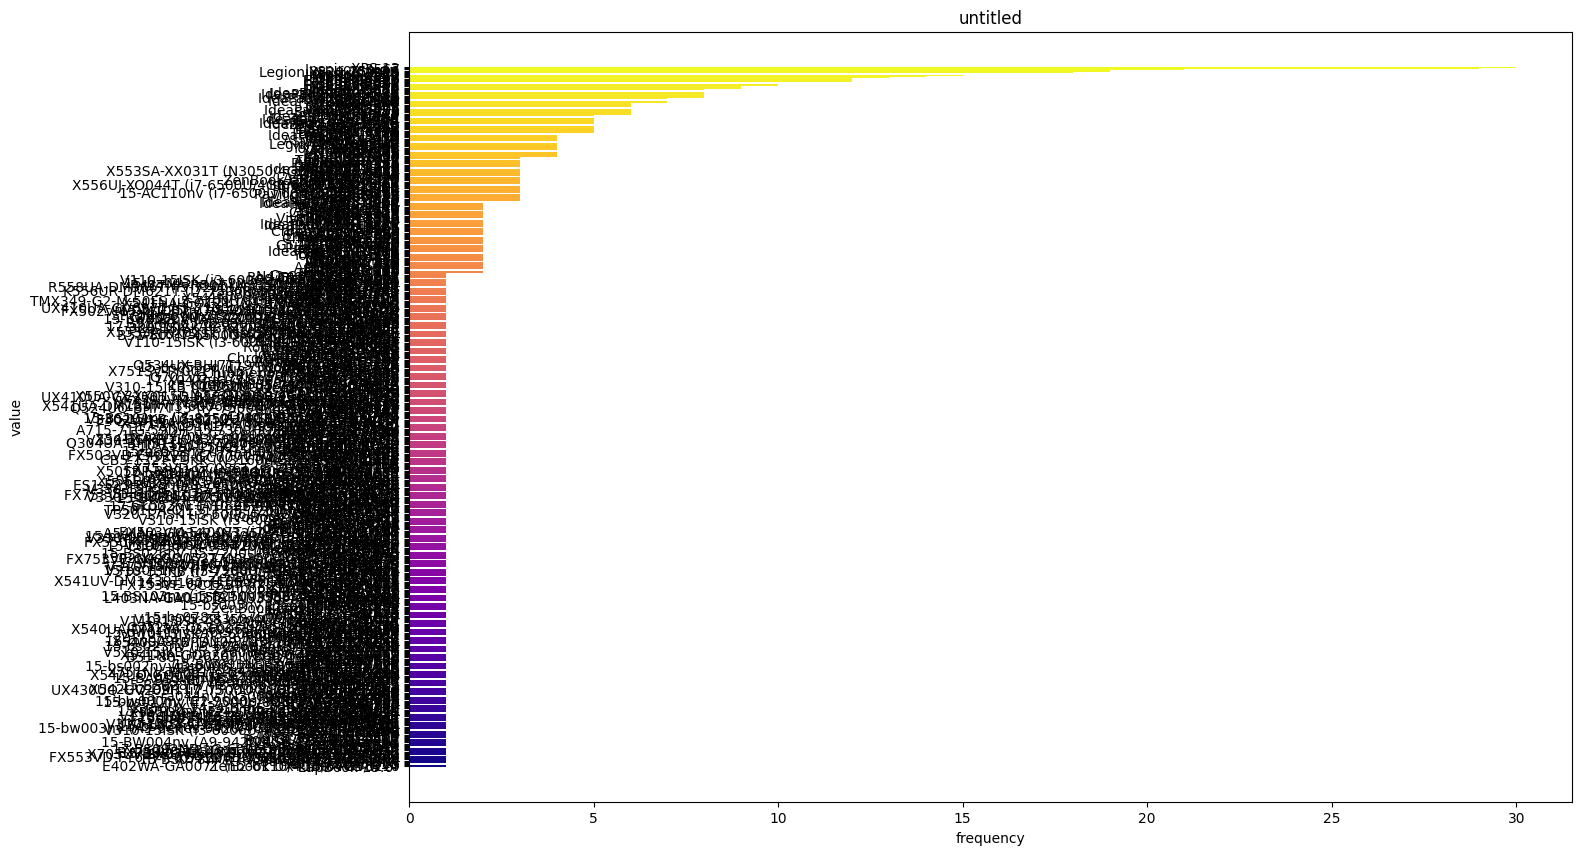

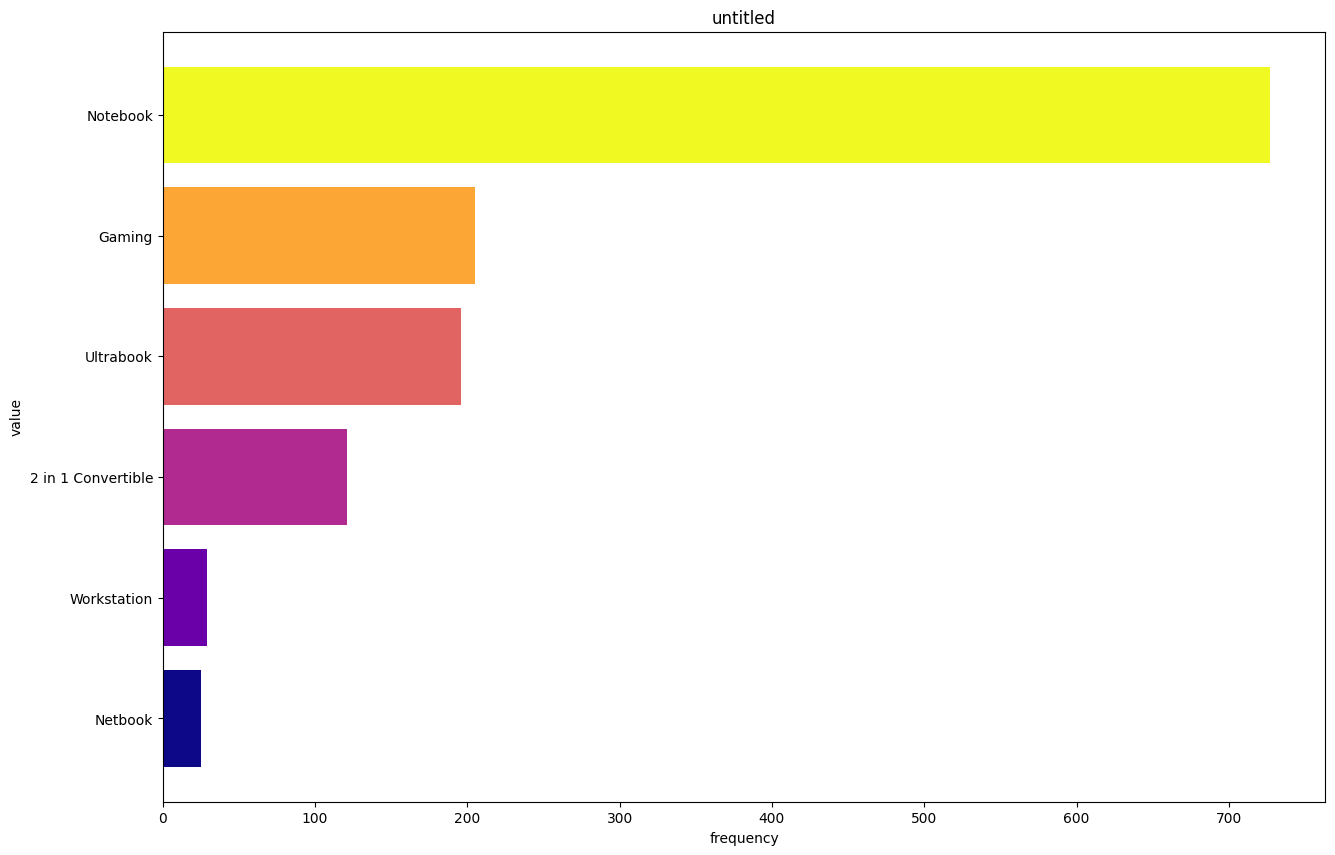

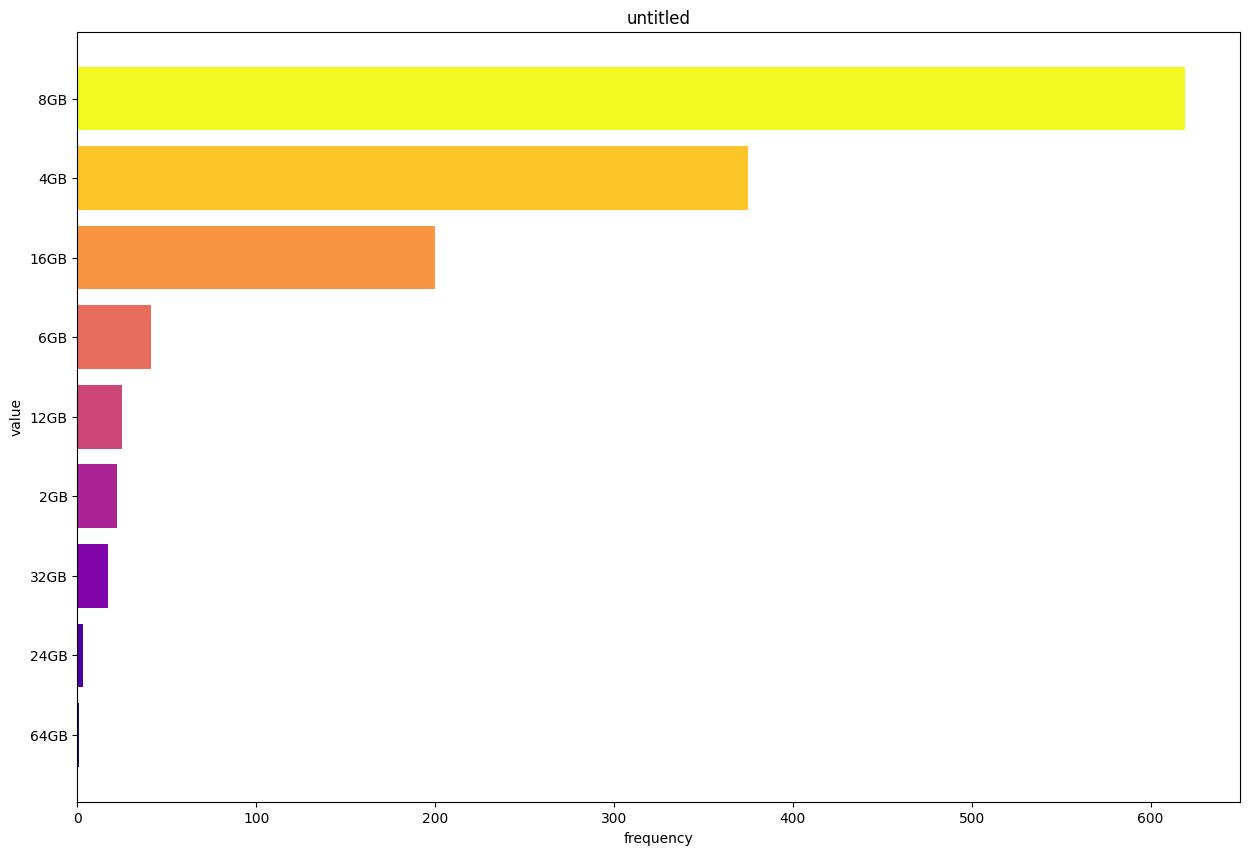

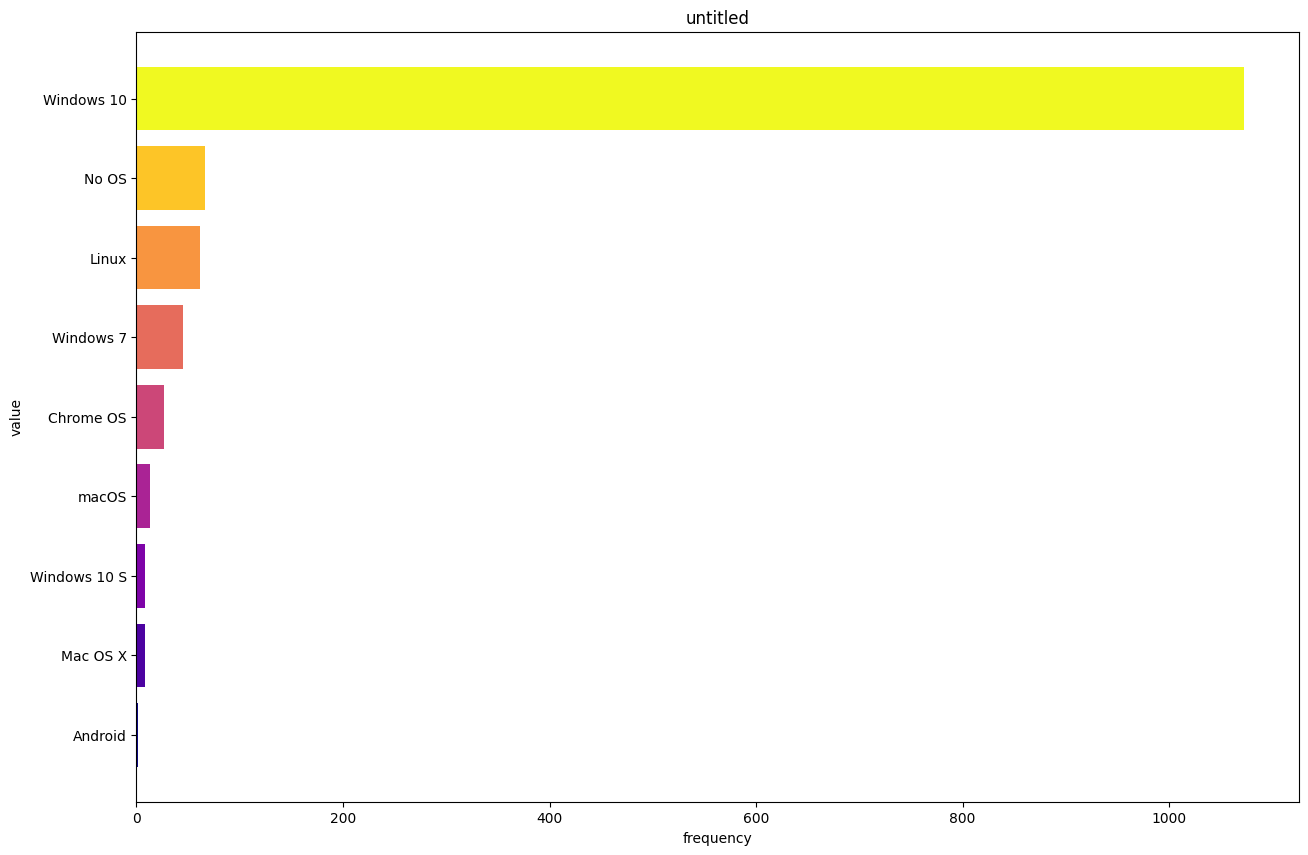

In [14]:
for cat_col in cat_cols:
    view_value_frequency(lp_X[cat_col].value_counts(), limit=lp_X[cat_col].unique().size)

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:355: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis = sb.barplot(x=label_freq.values, y=labels, palette="flare") \


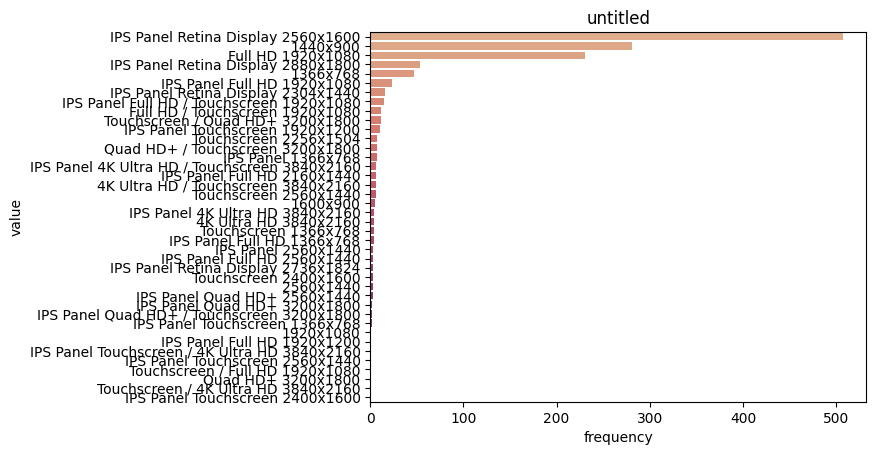

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:355: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis = sb.barplot(x=label_freq.values, y=labels, palette="flare") \


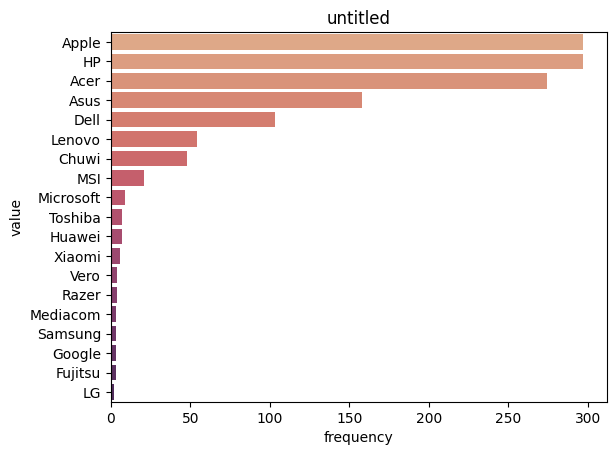

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:355: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis = sb.barplot(x=label_freq.values, y=labels, palette="flare") \


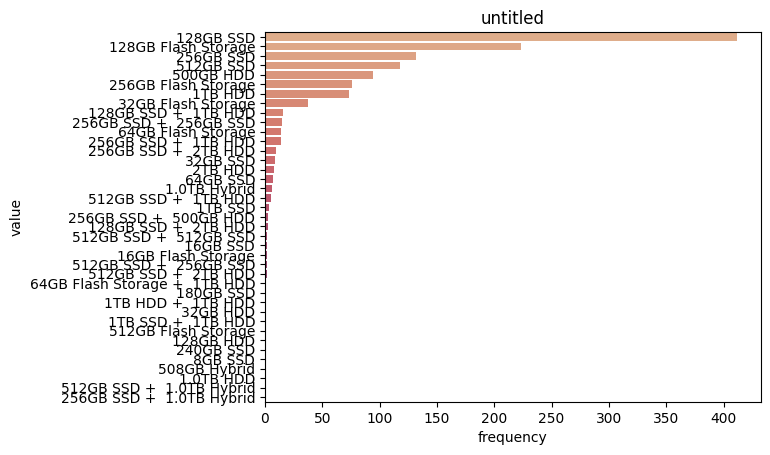

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:355: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis = sb.barplot(x=label_freq.values, y=labels, palette="flare") \


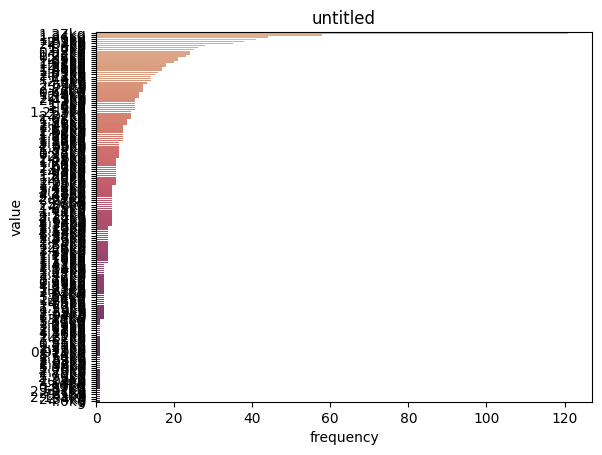

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:355: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis = sb.barplot(x=label_freq.values, y=labels, palette="flare") \


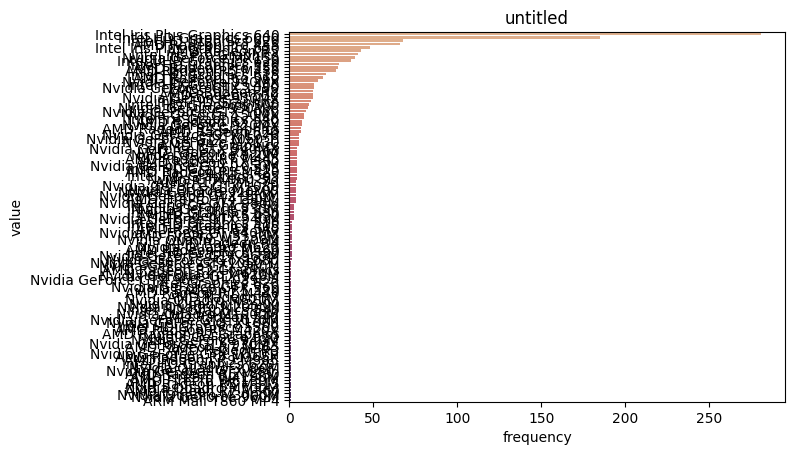

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:355: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis = sb.barplot(x=label_freq.values, y=labels, palette="flare") \


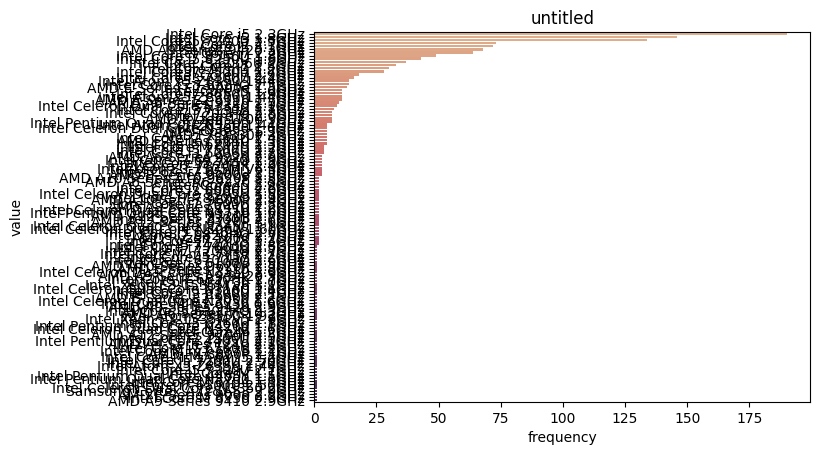

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:355: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis = sb.barplot(x=label_freq.values, y=labels, palette="flare") \


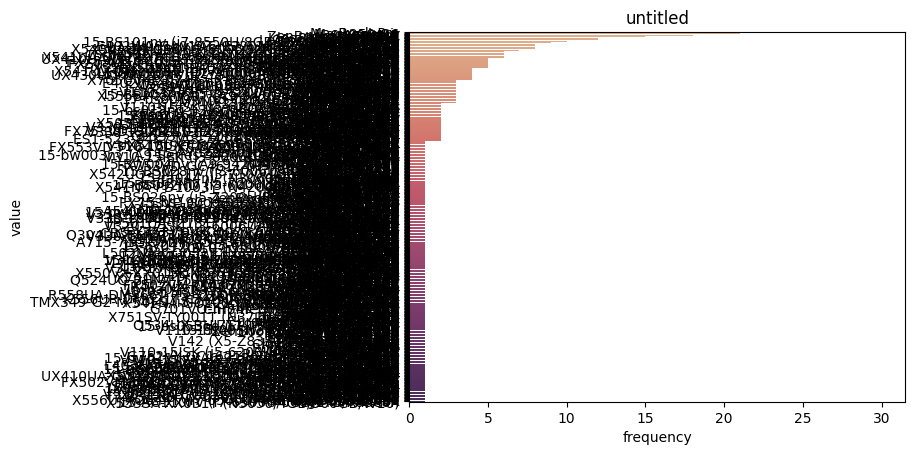

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:355: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis = sb.barplot(x=label_freq.values, y=labels, palette="flare") \


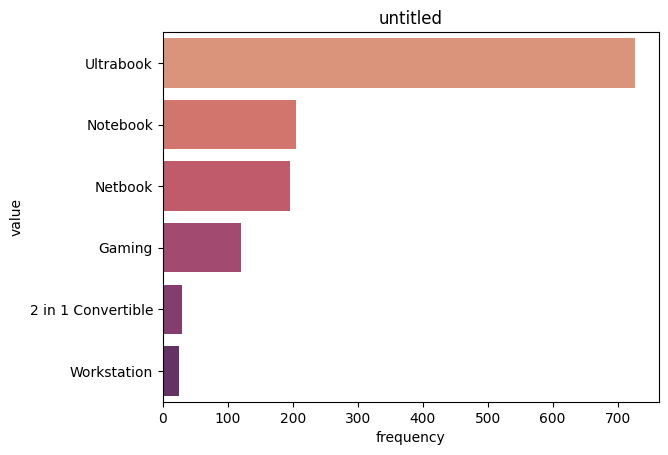

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:355: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis = sb.barplot(x=label_freq.values, y=labels, palette="flare") \


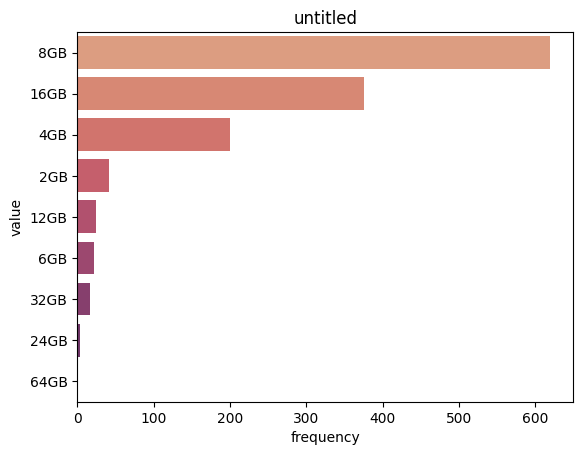

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\visualizers.py:355: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis = sb.barplot(x=label_freq.values, y=labels, palette="flare") \


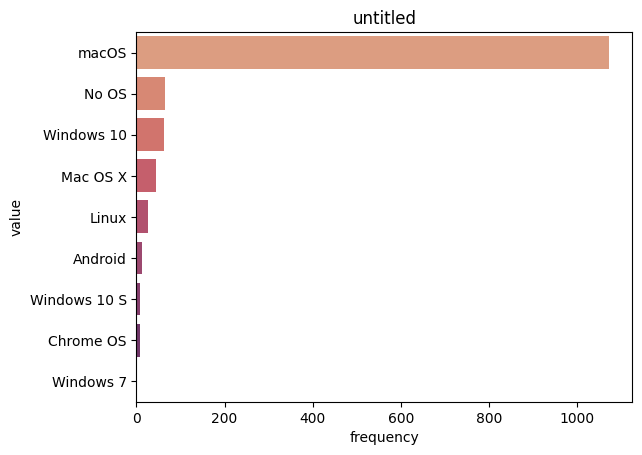

In [15]:
for cat_col in cat_cols:
    view_label_freq(lp_X[cat_col].value_counts(), labels=lp_X[cat_col].unique(), horizontal=True)

In [16]:
lp_X[cat_cols], lp_oe = encode_features(lp_X[cat_cols])
lp_X

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\preprocessors.py:44: SyntaxWarning: "is" with a literal. Did you mean "=="?
  temp = MinMaxScaler() if scaler is 'min_max' else StandardScaler()
C:\Users\Mig\AppData\Local\Temp\ipykernel_11476\108560088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lp_X[cat_cols], lp_oe = encode_features(lp_X[cat_cols])


Company  Product  TypeName  Inches  ScreenResolution  Cpu  Ram  Memory  \
0           1      300         4    13.3                23   65    8       4   
1           1      301         4    13.3                 1   63    8       2   
2           7       50         3    15.6                 8   74    8      16   
3           1      300         4    15.4                25   85    1      29   
4           1      300         4    13.3                23   67    8      16   
...       ...      ...       ...     ...               ...  ...  ...     ...   
1298       10      580         0    14.0                13   89    5       4   
1299       10      588         0    13.3                19   89    1      29   
1300       10      196         3    14.0                 0   34    3      35   
1301        7        2         3    15.6                 0   89    7      10   
1302        2      568         3    15.6                 0   34    5      26   

      Gpu  OpSys  Weight  
0      58      8      38  
1      51      8      35  
2      53      4      74  
3       9      8      71  
4      59      8      38  
...   ...    ...     ...  
1298   47      5      78  
1299   47      5      41  
1300   40      5      56  
1301   21      5     104  
1302   40      5     113  

[1303 rows x 11 columns]

In [17]:
lp_X['Ram'].unique()

array([8, 1, 5, 3, 0, 7, 4, 2, 6], dtype=int64)

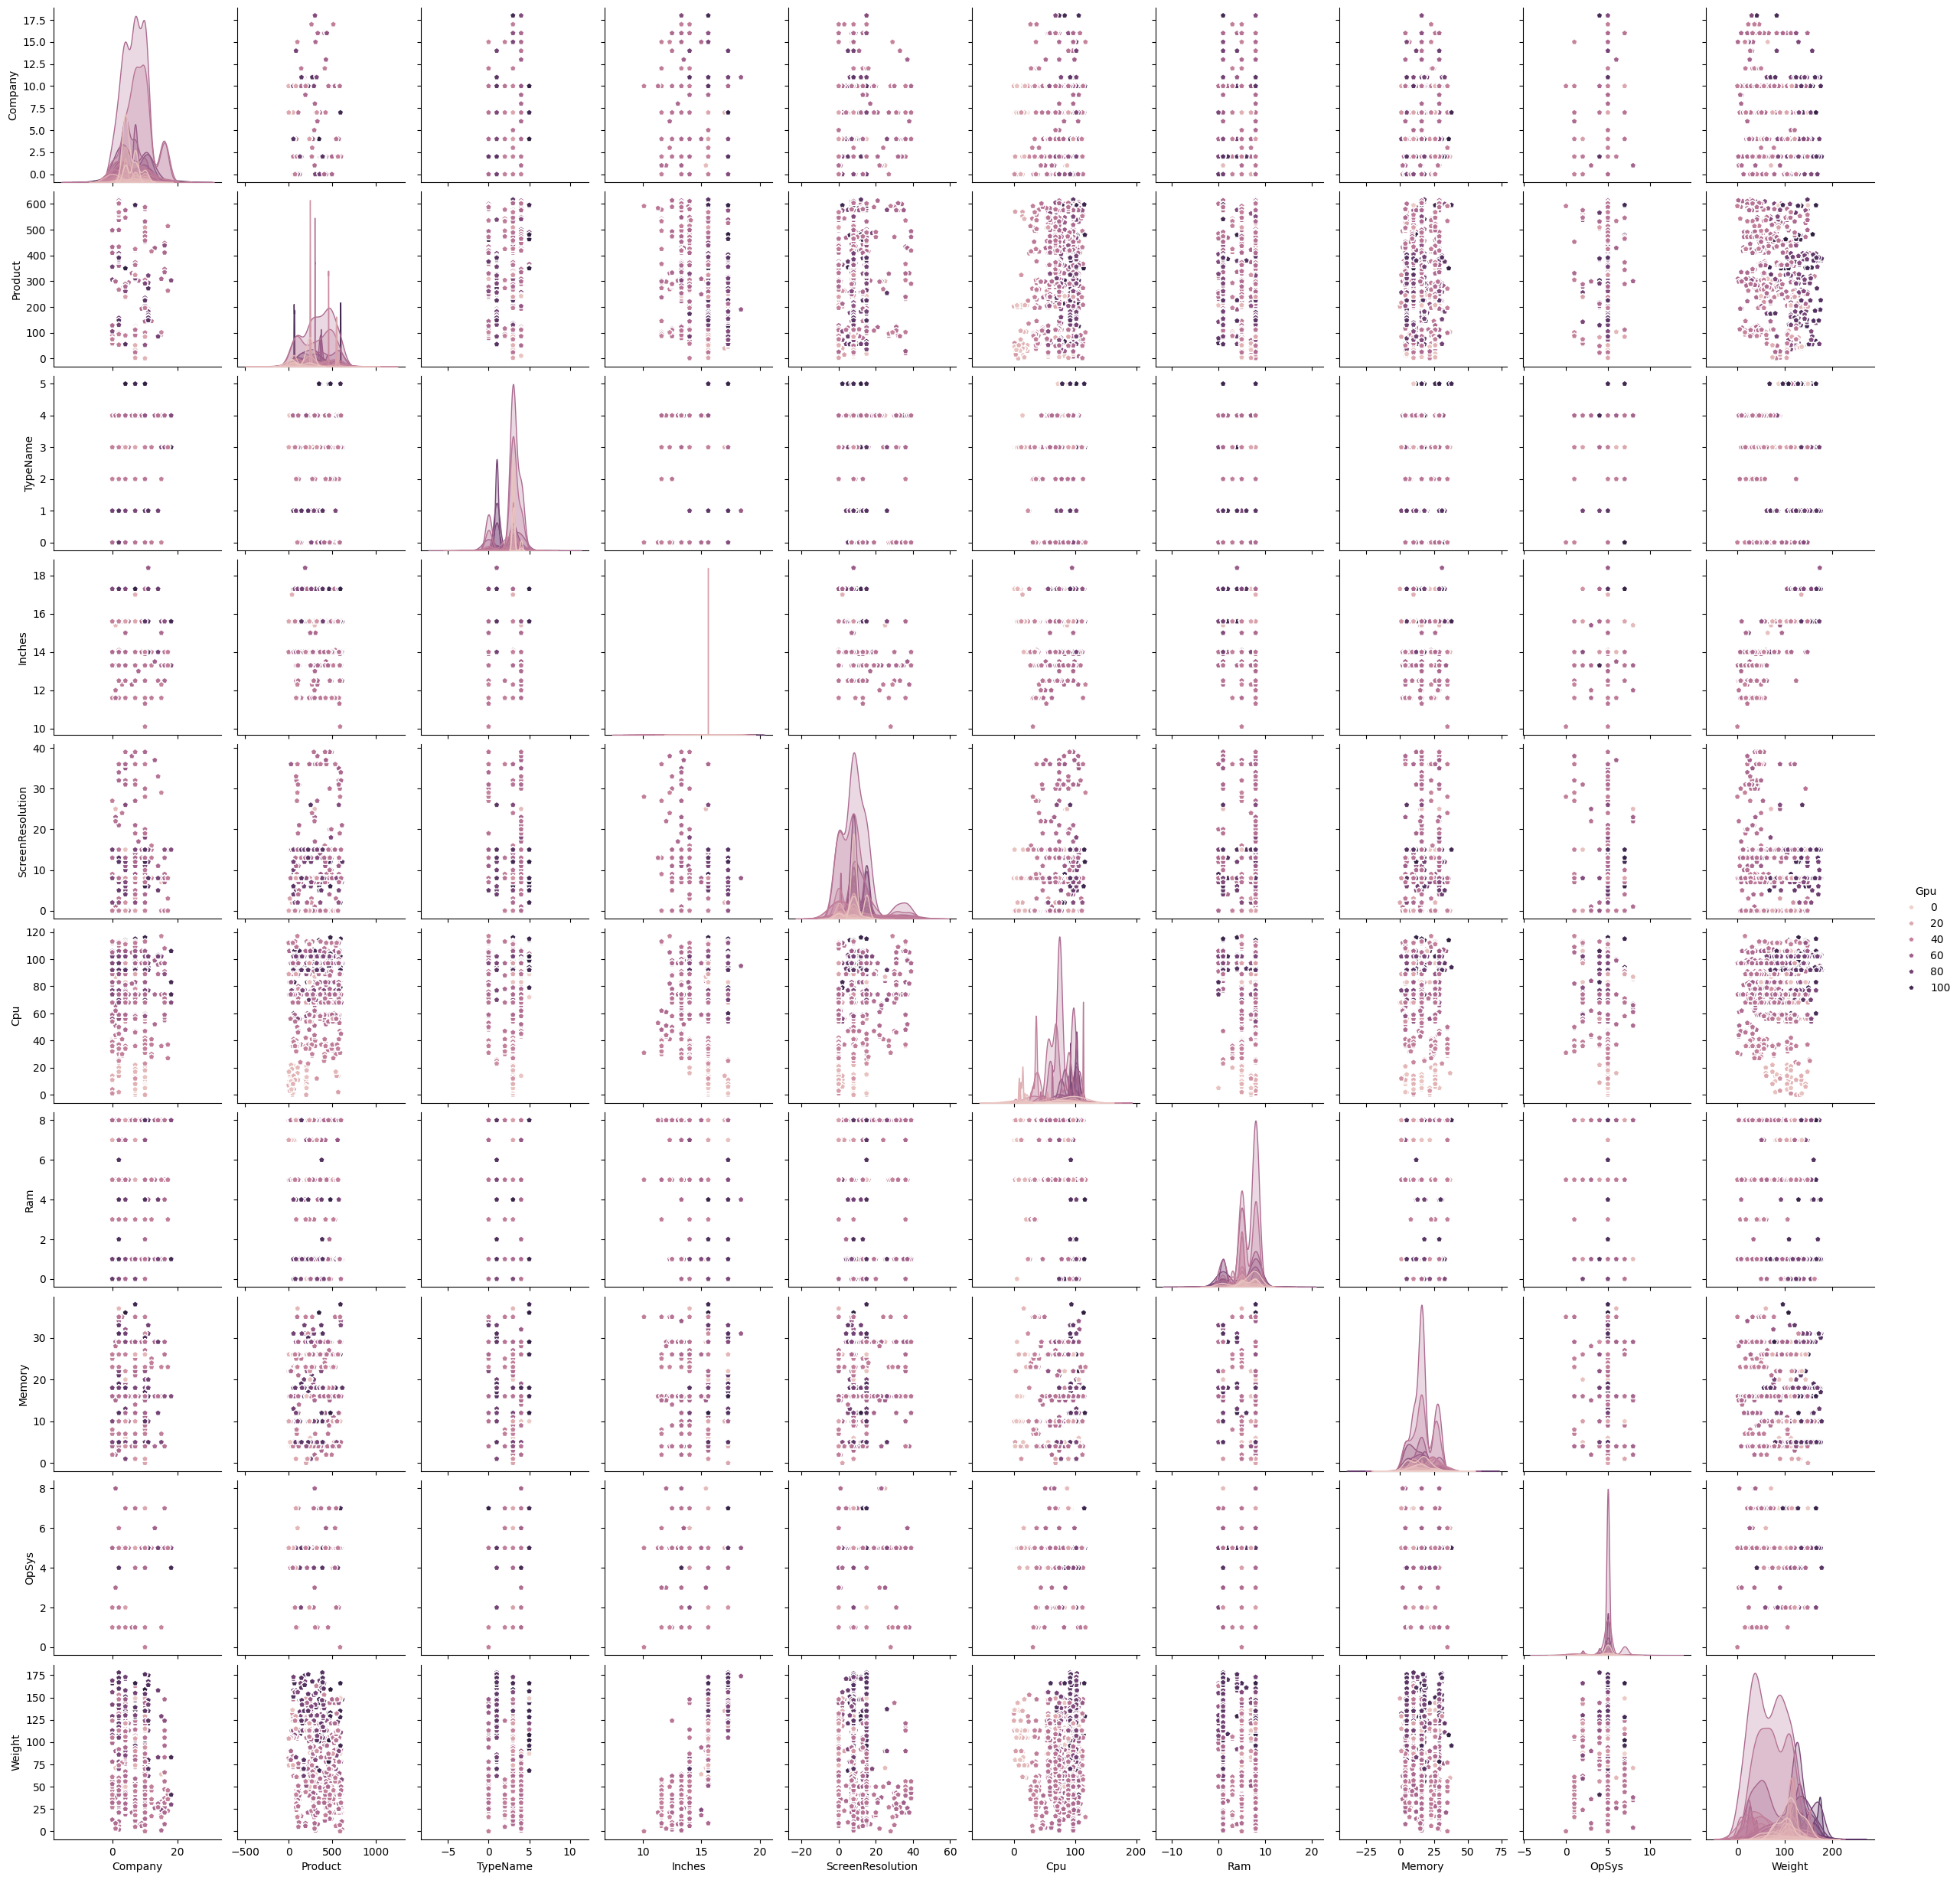

In [18]:
sb.set_palette('mako')
sb.pairplot(lp_X, hue="Gpu", plot_kws={'marker': 'p', 'linewidth': 1})

In [19]:
lp_X_trains, lp_X_cross, lp_Y_trains, lp_Y_cross = train_test_split(lp_X, lp_Y, test_size=0.3, random_state=0)

d:\Projects\To Github\project-seraphim\server-side\modelling\utilities\preprocessors.py:44: SyntaxWarning: "is" with a literal. Did you mean "=="?
  temp = MinMaxScaler() if scaler is 'min_max' else StandardScaler()


## Breast cancer diagnosis (all continuous inputs and discrete outputs)
1. load
2. visualize raw
3. encode categorical target
4. split
5. visualize split
6. normalize
7. visualize normalization

In [20]:
# use path below if in local machine
breast_cancer = pd.read_csv('./data/data.csv')
bc_X, bc_Y = breast_cancer.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1, inplace=False), breast_cancer['diagnosis']
bc_X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [21]:
get_cat_cols(bc_X)

[]

In [22]:
# note that 1 is now the malignant class 
# and 0 is the benign class/category
bc_Y, bc_Y_oe =  encode_features(bc_Y)
bc_Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [23]:
bc_X_trains, bc_X_cross, bc_Y_trains, bc_Y_cross = train_test_split(bc_X, bc_Y, test_size=0.3, random_state=0)

In [24]:
bc_X_trains, bc_X_cross, bc_scaler = normalize_train_cross(bc_X_trains, bc_X_cross)
bc_X_trains

array([[0.21340338, 0.20248963, 0.20869325, ..., 0.25597658, 0.2712399 ,
        0.24111242],
       [0.16607506, 0.36929461, 0.15942229, ..., 0.22487082, 0.12773507,
        0.1533517 ],
       [0.2493729 , 0.34149378, 0.23826964, ..., 0.28284533, 0.30514488,
        0.17237308],
       ...,
       [0.11619102, 0.35726141, 0.11077327, ..., 0.17402687, 0.17524147,
        0.17263545],
       [0.12963226, 0.35311203, 0.11706171, ..., 0.        , 0.06780997,
        0.06919848],
       [0.21434995, 0.59004149, 0.21235575, ..., 0.33251808, 0.10782574,
        0.21172767]])

# Modelling

## Regression

### Ensemble Modelling

In [25]:
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR

In [26]:
reg_a = LazyRegressor(
    verbose=0, 
    ignore_warnings=True, 
    custom_metric=None, 
    regressors=[LinearRegression, Ridge, Lasso, DecisionTreeRegressor, RandomForestRegressor, XGBRegressor, SVR])
reg_models_train_a, reg_preds_train_a = reg_a.fit(ch_X_trains, ch_X_trains, ch_Y_trains, ch_Y_trains)
reg_models_cross_a, reg_preds_cross_a = reg_a.fit(ch_X_trains, ch_X_cross, ch_Y_trains, ch_Y_cross)

100%|██████████| 7/7 [01:10<00:00, 10.09s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 7/7 [00:55<00:00,  8.00s/it]


#### Here the output of the clf.fit() method that fits multiple different models is actually a dataframe containing all the multiple different models we have trained and their respective metric values like Adjusted R-squared, R-squared, RMSE, etc. that we can always access easily through indexing.

In [27]:
reg_models_train_a

Adjusted R-Squared  R-Squared      RMSE  Time Taken
Model                                                                     
DecisionTreeRegressor                1.00       1.00      0.00        0.56
RandomForestRegressor                0.97       0.97  18448.73       32.14
XGBRegressor                         0.94       0.94  27923.76        0.50
LinearRegression                     0.64       0.64  69274.83        0.30
Lasso                                0.64       0.64  69274.83        0.46
Ridge                                0.64       0.64  69274.84        0.13
SVR                                 -0.05      -0.05 118117.57       36.53

In [28]:
reg_models_cross_a

Adjusted R-Squared  R-Squared      RMSE  Time Taken
Model                                                                     
XGBRegressor                         0.82       0.82  48777.43        0.17
RandomForestRegressor                0.81       0.81  50278.56       33.80
DecisionTreeRegressor                0.65       0.65  67967.54        0.54
LinearRegression                     0.63       0.63  70128.19        0.02
Lasso                                0.63       0.63  70128.41        0.41
Ridge                                0.63       0.63  70128.69        0.01
SVR                                 -0.05      -0.05 118240.49       21.02

In [29]:
reg_b = LazyRegressor(
    verbose=0, 
    ignore_warnings=True, 
    custom_metric=None)
reg_models_train_b, reg_preds_train_b = reg_b.fit(lp_X_trains, lp_X_trains, lp_Y_trains, lp_Y_trains)
reg_models_cross_b, reg_pred_cross_b = reg_b.fit(lp_X_trains, lp_X_cross, lp_Y_trains, lp_Y_cross)

100%|██████████| 42/42 [00:07<00:00,  5.78it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 912, number of used features: 11
[LightGBM] [Info] Start training from score 1100.095526
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:04<00:00,  8.65it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 912, number of used features: 11
[LightGBM] [Info] Start training from score 1100.095526


In [30]:
reg_models_train_b

Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
DecisionTreeRegressor                        1.00       1.00   12.58   
ExtraTreeRegressor                           1.00       1.00   12.58   
GaussianProcessRegressor                     1.00       1.00   12.58   
ExtraTreesRegressor                          1.00       1.00   12.58   
XGBRegressor                                 1.00       1.00   31.00   
RandomForestRegressor                        0.97       0.97  109.51   
BaggingRegressor                             0.97       0.97  124.79   
HistGradientBoostingRegressor                0.96       0.96  137.09   
LGBMRegressor                                0.96       0.96  138.41   
GradientBoostingRegressor                    0.92       0.92  185.18   
KNeighborsRegressor                          0.82       0.82  285.93   
AdaBoostRegressor                            0.64       0.64  404.69   
PoissonRegressor                             0.54       0.54  455.03   
TransformedTargetRegressor                   0.50       0.50  475.81   
Lars                                         0.50       0.50  475.81   
LinearRegression                             0.50       0.50  475.81   
Ridge                                        0.50       0.50  475.81   
RidgeCV                                      0.50       0.50  475.83   
LassoLars                                    0.50       0.50  475.83   
Lasso                                        0.50       0.50  475.83   
BayesianRidge                                0.50       0.50  475.86   
SGDRegressor                                 0.50       0.50  475.96   
LassoLarsIC                                  0.50       0.50  476.08   
LarsCV                                       0.49       0.50  478.40   
LassoLarsCV                                  0.49       0.50  478.40   
LassoCV                                      0.49       0.50  478.51   
OrthogonalMatchingPursuitCV                  0.48       0.49  483.64   
HuberRegressor                               0.48       0.48  484.37   
ElasticNetCV                                 0.48       0.48  484.87   
ElasticNet                                   0.47       0.47  489.72   
PassiveAggressiveRegressor                   0.46       0.46  494.72   
GammaRegressor                               0.43       0.44  505.84   
TweedieRegressor                             0.42       0.43  509.05   
OrthogonalMatchingPursuit                    0.29       0.30  562.72   
RANSACRegressor                              0.17       0.18  611.64   
NuSVR                                        0.02       0.04  661.77   
SVR                                         -0.01       0.01  672.22   
DummyRegressor                              -0.01       0.00  674.23   
LinearSVR                                   -0.24      -0.23  747.59   
MLPRegressor                                -0.78      -0.76  894.52   
KernelRidge                                 -2.20      -2.16 1198.58   

                               Time Taken  
Model                                      
DecisionTreeRegressor                0.03  
ExtraTreeRegressor                   0.04  
GaussianProcessRegressor             0.41  
ExtraTreesRegressor                  0.76  
XGBRegressor                         0.09  
RandomForestRegressor                1.20  
BaggingRegressor                     0.19  
HistGradientBoostingRegressor        0.49  
LGBMRegressor                        0.16  
GradientBoostingRegressor            0.25  
KNeighborsRegressor                  0.06  
AdaBoostRegressor                    0.26  
PoissonRegressor                     0.04  
TransformedTargetRegressor           0.01  
Lars                                 0.05  
LinearRegression                     0.01  
Ridge                                0.01  
RidgeCV                              0.06  
LassoLars                            0.02  
Lasso     

In [31]:
reg_models_cross_b

Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
ExtraTreesRegressor                          0.80       0.81  328.89   
GradientBoostingRegressor                    0.80       0.80  332.52   
RandomForestRegressor                        0.79       0.80  338.34   
XGBRegressor                                 0.79       0.79  340.89   
LGBMRegressor                                0.79       0.79  341.50   
HistGradientBoostingRegressor                0.78       0.79  347.35   
BaggingRegressor                             0.77       0.77  356.69   
DecisionTreeRegressor                        0.69       0.70  408.84   
KNeighborsRegressor                          0.64       0.65  446.39   
AdaBoostRegressor                            0.54       0.56  499.21   
ExtraTreeRegressor                           0.50       0.52  521.57   
PoissonRegressor                             0.45       0.47  546.89   
SGDRegressor                                 0.40       0.42  573.09   
TransformedTargetRegressor                   0.40       0.42  573.48   
LinearRegression                             0.40       0.42  573.48   
Lars                                         0.40       0.42  573.48   
Ridge                                        0.40       0.42  573.51   
RidgeCV                                      0.40       0.41  573.82   
LassoLars                                    0.40       0.41  573.97   
Lasso                                        0.40       0.41  573.98   
BayesianRidge                                0.40       0.41  574.07   
LassoLarsIC                                  0.39       0.41  575.31   
LassoLarsCV                                  0.38       0.40  580.59   
LarsCV                                       0.38       0.40  580.59   
LassoCV                                      0.38       0.40  580.76   
HuberRegressor                               0.38       0.40  582.38   
ElasticNetCV                                 0.37       0.39  586.17   
PassiveAggressiveRegressor                   0.36       0.38  590.99   
OrthogonalMatchingPursuitCV                  0.36       0.38  591.05   
ElasticNet                                   0.36       0.38  591.09   
GammaRegressor                               0.33       0.35  606.82   
TweedieRegressor                             0.32       0.34  609.23   
OrthogonalMatchingPursuit                    0.21       0.23  658.11   
RANSACRegressor                              0.11       0.14  695.60   
NuSVR                                       -0.03       0.00  749.90   
DummyRegressor                              -0.04      -0.01  754.05   
SVR                                         -0.08      -0.05  767.48   
LinearSVR                                   -0.34      -0.30  855.77   
MLPRegressor                                -0.74      -0.69  974.90   
KernelRidge                                 -1.86      -1.78 1250.41   
GaussianProcessRegressor                   -47.15     -45.79 5129.98   

                               Time Taken  
Model                                      
ExtraTreesRegressor                  0.68  
GradientBoostingRegressor            0.22  
RandomForestRegressor                1.19  
XGBRegressor                         0.11  
LGBMRegressor                        0.07  
HistGradientBoostingRegressor        0.39  
BaggingRegressor                     0.13  
DecisionTreeRegressor                0.02  
KNeighborsRegressor                  0.02  
AdaBoostRegressor                    0.15  
ExtraTreeRegressor                   0.02  
PoissonRegressor                     0.02  
SGDRegressor                         0.02  
TransformedTargetRegressor           0.01  
LinearRegression                     0.01  
Lars                                 0.01  
Ridge                                0.01  
RidgeCV                              0.02  
LassoLars                            0.01  
Lasso     

### Individual Modelling
once we identify the top 3 to 6 models using the LazyRegressor or LazyClassifier objects we can individually train them and tune their hyperparameters using grid search

#### Linear Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Pipeline is akin to a Sequential class in tf where architecture of model is defined
from sklearn.pipeline import Pipeline

In [33]:
poly = PolynomialFeatures(degree=2, include_bias=False)
scaler = StandardScaler()
model = LinearRegression()

poly_model = Pipeline([
    ("engineered features", poly),
    ("input normalizer|standardizer", scaler),
    ("linear regression model", model),
])

poly_model.fit(ch_X_trains, ch_Y_trains)

Pipeline(steps=[('engineered features', PolynomialFeatures(include_bias=False)),
                ('input normalizer|standardizer', StandardScaler()),
                ('linear regression model', LinearRegression())])

In [34]:
poly_model.score(ch_X_cross, ch_Y_cross)

0.6945189151554465

In [35]:
# merge both first 10 rows of training and testing model dataframes
top_reg_models_a = get_top_models(reg_models_train_a, reg_models_cross_a)
top_reg_models_a

Model  Train Adjusted R-Squared  Train R-Squared  \
0  DecisionTreeRegressor                      1.00             1.00   
1  RandomForestRegressor                      0.97             0.97   
2           XGBRegressor                      0.94             0.94   
3       LinearRegression                      0.64             0.64   
4                  Lasso                      0.64             0.64   
5                  Ridge                      0.64             0.64   
6                    SVR                     -0.05            -0.05   

   Train RMSE  Train Time Taken  Cross Adjusted R-Squared  Cross R-Squared  \
0        0.00              0.56                      0.65             0.65   
1    18448.73             32.14                      0.81             0.81   
2    27923.76              0.50                      0.82             0.82   
3    69274.83              0.30                      0.63             0.63   
4    69274.83              0.46                      0.63             0.63   
5    69274.84              0.13                      0.63             0.63   
6   118117.57             36.53                     -0.05            -0.05   

   Cross RMSE  Cross Time Taken  
0    67967.54              0.54  
1    50278.56             33.80  
2    48777.43              0.17  
3    70128.19              0.02  
4    70128.41              0.41  
5    70128.69              0.01  
6   118240.49             21.02

In [36]:
# merge both first 10 rows of training and testing model dataframes
top_reg_models_b = get_top_models(reg_models_train_b, reg_models_cross_b)
top_reg_models_b

Model  Train Adjusted R-Squared  Train R-Squared  \
0          DecisionTreeRegressor                      1.00             1.00   
1            ExtraTreesRegressor                      1.00             1.00   
2                   XGBRegressor                      1.00             1.00   
3          RandomForestRegressor                      0.97             0.97   
4               BaggingRegressor                      0.97             0.97   
5  HistGradientBoostingRegressor                      0.96             0.96   
6                  LGBMRegressor                      0.96             0.96   
7      GradientBoostingRegressor                      0.92             0.92   

   Train RMSE  Train Time Taken  Cross Adjusted R-Squared  Cross R-Squared  \
0       12.58              0.03                      0.69             0.70   
1       12.58              0.76                      0.80             0.81   
2       31.00              0.09                      0.79             0.79   
3      109.51              1.20                      0.79             0.80   
4      124.79              0.19                      0.77             0.77   
5      137.09              0.49                      0.78             0.79   
6      138.41              0.16                      0.79             0.79   
7      185.18              0.25                      0.80             0.80   

   Cross RMSE  Cross Time Taken  
0      408.84              0.02  
1      328.89              0.68  
2      340.89              0.11  
3      338.34              1.19  
4      356.69              0.13  
5      347.35              0.39  
6      341.50              0.07  
7      332.52              0.22

## Classification

### Ensemble Modelling

In [37]:
from lazypredict.Supervised import LazyClassifier

In [38]:
clf_a = LazyClassifier(
    verbose=0, 
    ignore_warnings=True, 
    custom_metric=None,)
clf_models_train_a, clf_preds_train_a = clf_a.fit(bc_X_trains, bc_X_trains, bc_Y_trains, bc_Y_trains)
clf_models_cross_a, clf_preds_cross_a = clf_a.fit(bc_X_trains, bc_X_cross, bc_Y_trains, bc_Y_cross)

100%|██████████| 29/29 [00:02<00:00, 11.95it/s]


[LightGBM] [Info] Number of positive: 149, number of negative: 249
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000640 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3970
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374372 -> initscore=-0.513507
[LightGBM] [Info] Start training from score -0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

100%|██████████| 29/29 [00:01<00:00, 17.57it/s]

[LightGBM] [Info] Number of positive: 149, number of negative: 249
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3970
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374372 -> initscore=-0.513507
[LightGBM] [Info] Start training from score -0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [39]:
clf_models_train_a

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
ExtraTreesClassifier               1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               1.00     1.00      1.00   
LabelSpreading                     1.00               1.00     1.00      1.00   
LabelPropagation                   1.00               1.00     1.00      1.00   
LGBMClassifier                     1.00               1.00     1.00      1.00   
ExtraTreeClassifier                1.00               1.00     1.00      1.00   
DecisionTreeClassifier             1.00               1.00     1.00      1.00   
BaggingClassifier                  0.99               0.99     0.99      0.99   
LogisticRegression                 0.99               0.99     0.99      0.99   
LinearSVC                          0.99               0.99     0.99      0.99   
SGDClassifier                      0.98               0.98     0.98      0.98   
SVC                                0.98               0.98     0.98      0.98   
PassiveAggressiveClassifier        0.97               0.98     0.98      0.97   
Perceptron                         0.97               0.97     0.97      0.97   
CalibratedClassifierCV             0.98               0.97     0.97      0.98   
KNeighborsClassifier               0.97               0.97     0.97      0.97   
QuadraticDiscriminantAnalysis      0.97               0.97     0.97      0.97   
RidgeClassifier                    0.96               0.95     0.95      0.96   
RidgeClassifierCV                  0.96               0.95     0.95      0.96   
LinearDiscriminantAnalysis         0.96               0.95     0.95      0.96   
BernoulliNB                        0.95               0.94     0.94      0.95   
NuSVC                              0.95               0.94     0.94      0.95   
GaussianNB                         0.94               0.93     0.93      0.94   
NearestCentroid                    0.93               0.92     0.92      0.93   
DummyClassifier                    0.63               0.50     0.50      0.48   

                               Time Taken  
Model                                      
AdaBoostClassifier                   0.55  
ExtraTreesClassifier                 0.17  
XGBClassifier                        0.11  
RandomForestClassifier               0.36  
LabelSpreading                       0.04  
LabelPropagation                     0.03  
LGBMClassifier                       0.08  
ExtraTreeClassifier                  0.02  
DecisionTreeClassifier               0.03  
BaggingClassifier                    0.15  
LogisticRegression                   0.06  
LinearSVC                            0.02  
SGDClassifier                        0.01  
SVC                                  0.02  
PassiveAggressiveClassifier          0.03  
Perceptron                           0.02  
CalibratedClassifierCV               0.08  
KNeighborsClassifier                 0.33  
QuadraticDiscriminantAnalysis        0.10  
RidgeClassifier                      0.01  
RidgeClassifierCV                    0.02  
LinearDiscriminantAnalysis           0.04  
BernoulliNB                          0.01  
NuSVC                                0.05  
GaussianNB                           0.01  
NearestCentroid                      0.01  
DummyClassifier                      0.01

In [40]:
clf_models_cross_a

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.98               0.98     0.98      0.98   
XGBClassifier                      0.98               0.97     0.97      0.98   
LogisticRegression                 0.98               0.97     0.97      0.98   
SVC                                0.98               0.97     0.97      0.98   
AdaBoostClassifier                 0.96               0.97     0.97      0.97   
RandomForestClassifier             0.96               0.96     0.96      0.96   
LinearDiscriminantAnalysis         0.97               0.96     0.96      0.97   
ExtraTreesClassifier               0.96               0.96     0.96      0.96   
QuadraticDiscriminantAnalysis      0.95               0.95     0.95      0.95   
RidgeClassifierCV                  0.96               0.95     0.95      0.96   
RidgeClassifier                    0.96               0.95     0.95      0.96   
SGDClassifier                      0.95               0.95     0.95      0.95   
PassiveAggressiveClassifier        0.95               0.95     0.95      0.95   
KNeighborsClassifier               0.96               0.95     0.95      0.96   
CalibratedClassifierCV             0.96               0.95     0.95      0.96   
Perceptron                         0.94               0.94     0.94      0.94   
LinearSVC                          0.94               0.94     0.94      0.94   
DecisionTreeClassifier             0.93               0.93     0.93      0.93   
BernoulliNB                        0.93               0.93     0.93      0.93   
NuSVC                              0.93               0.92     0.92      0.93   
BaggingClassifier                  0.92               0.92     0.92      0.92   
NearestCentroid                    0.92               0.91     0.91      0.92   
LabelSpreading                     0.92               0.91     0.91      0.92   
GaussianNB                         0.91               0.91     0.91      0.91   
LabelPropagation                   0.92               0.91     0.91      0.92   
ExtraTreeClassifier                0.88               0.89     0.89      0.88   
DummyClassifier                    0.63               0.50     0.50      0.49   

                               Time Taken  
Model                                      
LGBMClassifier                       0.11  
XGBClassifier                        0.07  
LogisticRegression                   0.02  
SVC                                  0.02  
AdaBoostClassifier                   0.35  
RandomForestClassifier               0.37  
LinearDiscriminantAnalysis           0.02  
ExtraTreesClassifier                 0.16  
QuadraticDiscriminantAnalysis        0.01  
RidgeClassifierCV                    0.02  
RidgeClassifier                      0.01  
SGDClassifier                        0.02  
PassiveAggressiveClassifier          0.01  
KNeighborsClassifier                 0.03  
CalibratedClassifierCV               0.06  
Perceptron                           0.01  
LinearSVC                            0.01  
DecisionTreeClassifier               0.03  
BernoulliNB                          0.02  
NuSVC                                0.03  
BaggingClassifier                    0.14  
NearestCentroid                      0.01  
LabelSpreading                       0.03  
GaussianNB                           0.01  
LabelPropagation                     0.02  
ExtraTreeClassifier                  0.01  
DummyClassifier                      0.01

In [44]:
# merge both first 10 rows of training and testing model dataframes
top_clf_models_a = get_top_models(clf_models_train_a, clf_models_cross_a, model_type='classifier')
top_clf_models_a

Model  Train Train Train Train Accuracy  \
4          LGBMClassifier                              1.00   
2           XGBClassifier                              1.00   
0      AdaBoostClassifier                              1.00   
3  RandomForestClassifier                              1.00   
1    ExtraTreesClassifier                              1.00   

   Train Train Train Train Balanced Accuracy  Train Train Train Train ROC AUC  \
4                                       1.00                             1.00   
2                                       1.00                             1.00   
0                                       1.00                             1.00   
3                                       1.00                             1.00   
1                                       1.00                             1.00   

   Train Train Train Train F1 Score  Train Train Train Train Time Taken  \
4                              1.00                                0.08   
2                              1.00                                0.11   
0                              1.00                                0.55   
3                              1.00                                0.36   
1                              1.00                                0.17   

   Cross Accuracy  Cross Balanced Accuracy  Cross ROC AUC  Cross F1 Score  \
4            0.98                     0.98           0.98            0.98   
2            0.98                     0.97           0.97            0.98   
0            0.96                     0.97           0.97            0.97   
3            0.96                     0.96           0.96            0.96   
1            0.96                     0.96           0.96            0.96   

   Cross Time Taken  
4              0.11  
2              0.07  
0              0.35  
3              0.37  
1              0.16

### Individual Modelling
from here once we get the top models for comparison we can individually train them and tune their hyperparameters using grid search this can range from Logistic Regression Decision Trees, Random Forests, Extreme Gradient Boosted, Naive Bayes, Support Vector Machine. Should the base model using lazypredict achieve a high enough metric value like for example a 90%+ accuracy then there is no need to tune the hyper parameters anymore

In [45]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [46]:
lgbm = LGBMClassifier()
lgbm.fit(bc_X_trains, bc_Y_trains)

[LightGBM] [Info] Number of positive: 149, number of negative: 249
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3978
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374372 -> initscore=-0.513507
[LightGBM] [Info] Start training from score -0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier()

In [47]:
lgbm.score(bc_X_cross, bc_Y_cross)

0.9824561403508771

In [48]:
save_model(lgbm, "./saved/models/lgbm.pkl")

In [49]:
saved_lgbm = load_model("./saved/models/lgbm.pkl")
saved_lgbm.score(bc_X_cross, bc_Y_cross)

0.9824561403508771

In [50]:
type(saved_lgbm).__name__

'LGBMClassifier'

In [51]:
Y_preds = saved_lgbm.predict(bc_X_cross)
Y_preds

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

## Clustering

In [52]:
from utilities.visualizers import plot_evolution
from sklearn.cluster import DBSCAN, KMeans

In [53]:
# read unlabeled data
df = pd.read_csv('./data/E-commerce.csv')

# drop ID and profile information column column
df.drop(columns=['ID', 'profile_information'], inplace=True)
X = df.to_numpy()
K = 3
epochs = 300

In [54]:
df

n_clicks  n_visits  amount_spent  amount_discount  \
0          643       142        300.00           228.43   
1          527        95        743.83            60.88   
2          367        49        305.67            72.96   
3          466        30        291.19           101.90   
4          715       169        703.14           506.42   
...        ...       ...           ...              ...   
2495       231       165       3328.63           148.31   
2496       241        26       1985.95             5.13   
2497       561        85        936.92           146.64   
2498       347        61        404.91           119.28   
2499       823       160       1433.68          1138.22   

      days_since_registration  
0                         132  
1                          86  
2                         334  
3                         131  
4                         114  
...                       ...  
2495                      157  
2496                      220  
2497                       96  
2498                      194  
2499                      271  

[2500 rows x 5 columns]

In [55]:
X.shape

(2500, 5)

In [56]:
k_means = KMeans(n_clusters=K, max_iter=1, random_state=0)
k_means.fit(X)
print(k_means.cluster_centers_)

[[ 399.47145062   92.54398148  630.40939562  158.83583325  201.83256173]
 [ 254.91592129   69.28980322 3293.85964483   80.55262421  196.06976744]
 [ 560.44496124  120.18449612 1479.76549666 1116.8859466   203.49767442]]


In [57]:
k_means = KMeans(n_clusters=K, max_iter=2, random_state=0)
k_means.fit(X)
print(k_means.cluster_centers_)

[[ 406.53602941   93.63235294  650.7041783   181.17074589  202.19485294]
 [ 255.09368635   69.22403259 3461.06885549   84.57056717  198.51120163]
 [ 529.36825886  115.34668721 1584.56760092 1052.93563866  200.27734977]]


In [58]:
k_means = KMeans(n_clusters=K, max_iter=1, random_state=0)
k_means.fit(X)
print(k_means.cluster_centers_)

[[ 399.47145062   92.54398148  630.40939562  158.83583325  201.83256173]
 [ 254.91592129   69.28980322 3293.85964483   80.55262421  196.06976744]
 [ 560.44496124  120.18449612 1479.76549666 1116.8859466   203.49767442]]


In [59]:
prev_centroids = []
for epoch in range(1, 300 + 1):
    k_means = KMeans(n_clusters=K, max_iter=epoch, random_state=0)
    k_means.fit(X)
    prev_centroids.append(k_means.cluster_centers_)
prev_centroids = np.array(prev_centroids)

In [60]:
len(prev_centroids)

300

In [61]:
xs_centroids = k_means.predict(X)

In [62]:
np.unique(xs_centroids, return_counts=True)

(array([0, 1, 2]), array([ 671, 1325,  504], dtype=int64))

m: (300, 5)
centroids of cluster 0: [[ 399.47145062   92.54398148  630.40939562  158.83583325  201.83256173]
 [ 406.53602941   93.63235294  650.7041783   181.17074589  202.19485294]
 [ 405.60810811   93.44594595  637.74680614  174.53744533  201.74774775]
 ...
 [ 531.43517139  115.55439642 1553.36194956 1044.60725471  201.53204173]
 [ 531.43517139  115.55439642 1553.36194956 1044.60725471  201.53204173]
 [ 531.43517139  115.55439642 1553.36194956 1044.60725471  201.53204173]]

m: (300, 5)
centroids of cluster 1: [[ 254.91592129   69.28980322 3293.85964483   80.55262421  196.06976744]
 [ 255.09368635   69.22403259 3461.06885549   84.57056717  198.51120163]
 [ 255.07258065   69.4375     3448.92476087   84.2301466   198.22580645]
 ...
 [ 404.9645283    93.32226415  635.42273763  172.10644277  201.79471698]
 [ 404.9645283    93.32226415  635.42273763  172.10644277  201.79471698]
 [ 404.9645283    93.32226415  635.42273763  172.10644277  201.79471698]]

m: (300, 5)
centroids of cluster 2: [[

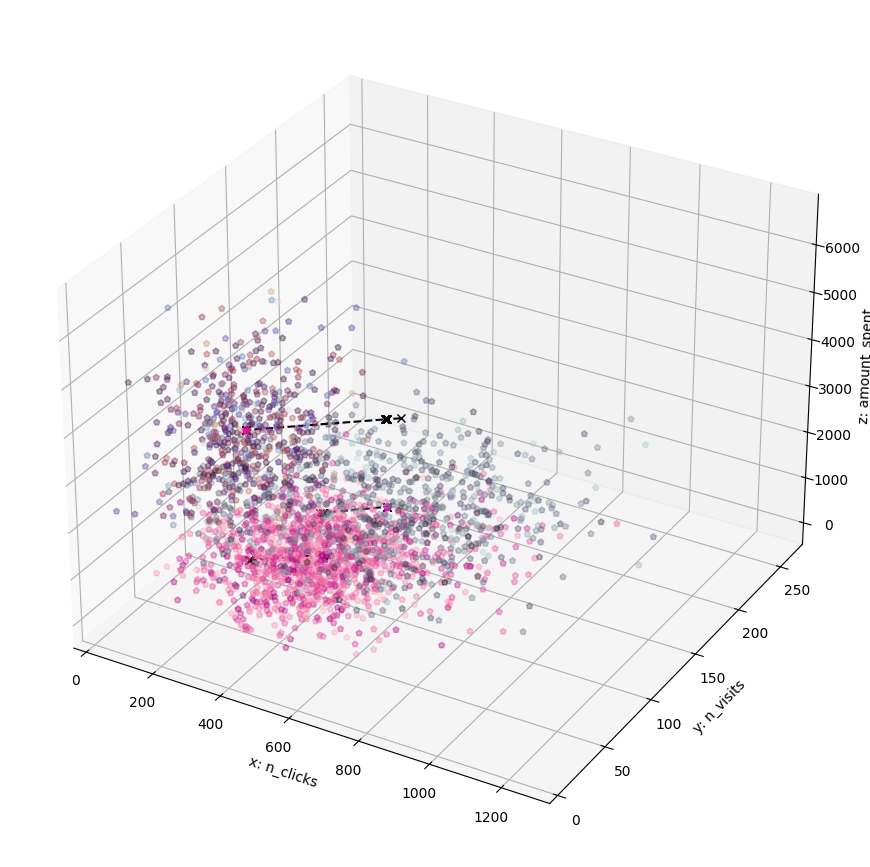

In [63]:
plot_evolution(X, K, prev_centroids, xs_centroids, features=['n_clicks', 'n_visits', 'amount_spent'], dimension='3d')

# Image Processing

In [64]:
train_gen, cross_gen, test_gen = create_image_set('./data/Micro_Organism/')

Copying files: 789 files [00:37, 21.08 files/s]


Found 549 images belonging to 8 classes.
Found 114 images belonging to 8 classes.
Found 126 images belonging to 8 classes.


In [65]:
next(train_gen)

(array([[[[0.40784317, 0.41176474, 0.38431376],
          [0.40784317, 0.41176474, 0.38431376],
          [0.40784317, 0.41176474, 0.38431376],
          ...,
          [0.42352945, 0.427451  , 0.4039216 ],
          [0.427451  , 0.427451  , 0.40784317],
          [0.42352945, 0.427451  , 0.41176474]],
 
         [[0.40784317, 0.41176474, 0.38431376],
          [0.40784317, 0.41176474, 0.38431376],
          [0.40784317, 0.41176474, 0.38431376],
          ...,
          [0.42352945, 0.427451  , 0.4039216 ],
          [0.427451  , 0.427451  , 0.40784317],
          [0.42352945, 0.427451  , 0.41176474]],
 
         [[0.41176474, 0.4156863 , 0.38823533],
          [0.41176474, 0.4156863 , 0.38823533],
          [0.41176474, 0.4156863 , 0.38823533],
          ...,
          [0.42352945, 0.427451  , 0.4039216 ],
          [0.427451  , 0.427451  , 0.41176474],
          [0.41960788, 0.42352945, 0.40784317]],
 
         ...,
 
         [[0.4039216 , 0.40784317, 0.4039216 ],
          [0.40000

In [66]:
next(cross_gen)

(array([[[[0.12941177, 0.21176472, 0.21176472],
          [0.12941177, 0.21176472, 0.21176472],
          [0.12941177, 0.21176472, 0.21176472],
          ...,
          [0.1254902 , 0.20784315, 0.20784315],
          [0.1254902 , 0.20392159, 0.21176472],
          [0.12941177, 0.21176472, 0.21176472]],
 
         [[0.12941177, 0.21568629, 0.21568629],
          [0.12941177, 0.21568629, 0.21568629],
          [0.12941177, 0.21568629, 0.21568629],
          ...,
          [0.1254902 , 0.20784315, 0.20784315],
          [0.1254902 , 0.20784315, 0.21176472],
          [0.12941177, 0.20784315, 0.21176472]],
 
         [[0.13333334, 0.21568629, 0.22352943],
          [0.13333334, 0.21568629, 0.22352943],
          [0.12941177, 0.21568629, 0.21960786],
          ...,
          [0.1254902 , 0.20784315, 0.20784315],
          [0.1254902 , 0.20784315, 0.21176472],
          [0.12941177, 0.20784315, 0.21176472]],
 
         ...,
 
         [[0.12941177, 0.21960786, 0.21568629],
          [0.12549

In [67]:
train_gen.class_indices

{'Amoeba': 0,
 'Euglena': 1,
 'Hydra': 2,
 'Paramecium': 3,
 'Rod_bacteria': 4,
 'Spherical_bacteria': 5,
 'Spiral_bacteria': 6,
 'Yeast': 7}

In [68]:
list(train_gen.class_indices.keys())

['Amoeba',
 'Euglena',
 'Hydra',
 'Paramecium',
 'Rod_bacteria',
 'Spherical_bacteria',
 'Spiral_bacteria',
 'Yeast']

In [69]:
images, labels = next(train_gen)

In [70]:
images[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [71]:
labels[0]

array([0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [72]:
images.shape

(128, 256, 256, 3)

In [73]:
len(train_gen)

5

In [74]:
len(cross_gen)

4

In [75]:
len(test_gen)

4

#### Here our training data went from 576 samples to 640 because of data augmentation, for validation from 114 to 32 * 4 or 128, and for testing from 126 to 32 * 4 or 128

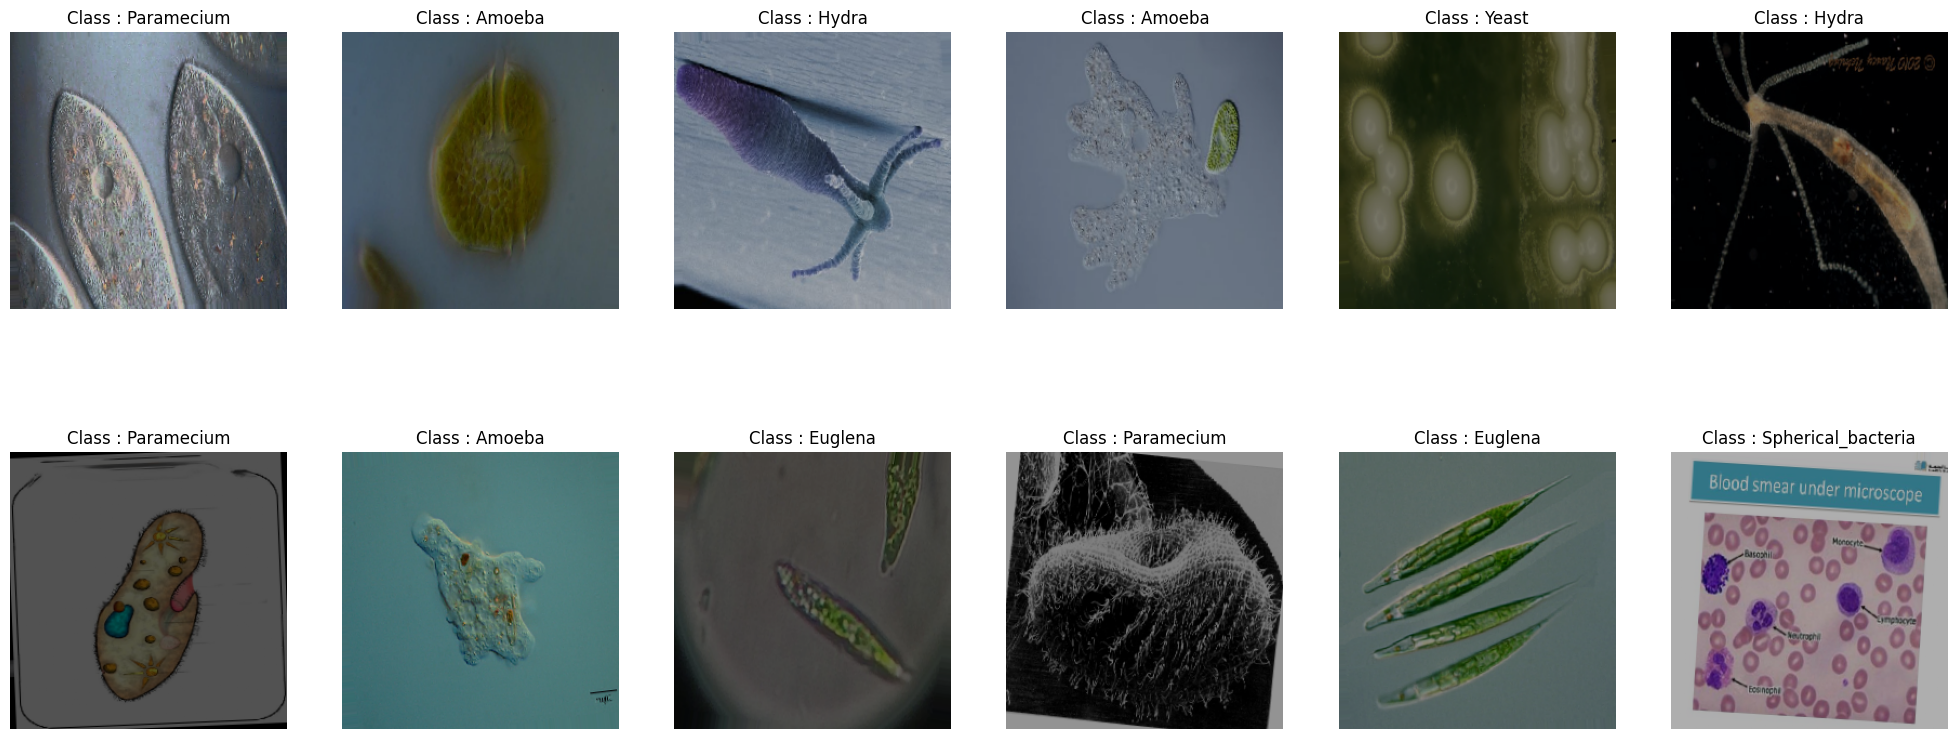

In [76]:
view_images(train_gen, save_img=False)

## NLP